In [62]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [130]:
fires= pd.read_csv('fires.csv')
fires

OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0               1          1         FS-1418826                FED   
1               2          2         FS-1418827                FED   
2               3          3         FS-1418835                FED   
3               4          4         FS-1418845                FED   
4               5          5         FS-1418847                FED   
...           ...        ...                ...                ...   
1880460   1880461  300348363  2015CAIRS29019636             NONFED   
1880461   1880462  300348373  2015CAIRS29217935             NONFED   
1880462   1880463  300348375  2015CAIRS28364460             NONFED   
1880463   1880464  300348377  2015CAIRS29218079             NONFED   
1880464   1880465  300348399  2015CAIRS26733926             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0         FS-FIRESTAT                    FS                USCAPNF   
1         FS-FIRESTAT                    FS                USCAENF   
2         FS-FIRESTAT                    FS                USCAENF   
3         FS-FIRESTAT                    FS                USCAENF   
4         FS-FIRESTAT                    FS                USCAENF   
...               ...                   ...                    ...   
1880460      ST-CACDF                ST/C&L                USCASHU   
1880461      ST-CACDF                ST/C&L                USCATCU   
1880462      ST-CACDF                ST/C&L                USCATCU   
1880463      ST-CACDF                ST/C&L                USCATCU   
1880464      ST-CACDF                ST/C&L                USCABDU   

         NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0          Plumas National Forest                   511   
1        Eldorado National Forest                   503   
2        Eldorado National Forest                   503   
3        Eldorado National Forest                   503   
4        Eldorado National Forest                   503   
...                           ...                   ...   
1880460       Shasta-Trinity Unit                 CASHU   
1880461   Tuolumne-Calaveras Unit                 CATCU   
1880462   Tuolumne-Calaveras Unit                 CATCU   
1880463   Tuolumne-Calaveras Unit                 CATCU   
1880464       San Bernardino Unit                 CABDU   

        SOURCE_REPORTING_UNIT_NAME  ...        DATE CONT_DATE_COR  \
0           PLUMAS NATIONAL FOREST  ...  2005-02-02    2005-02-02   
1         ELDORADO NATIONAL FOREST  ...  2004-05-12    2004-05-12   
2         ELDORADO NATIONAL FOREST  ...  2004-05-31    2004-05-31   
3         ELDORADO NATIONAL FOREST  ...  2004-06-28    2004-07-03   
4         ELDORADO NATIONAL FOREST  ...  2004-06-28    2004-07-03   
...                            ...  ...         ...           ...   
1880460        SHASTA-TRINITY UNIT  ...  2015-09-26    2015-09-26   
1880461    TUOLUMNE-CALAVERAS UNIT  ...  2015-10-05           NaN   
1880462    TUOLUMNE-CALAVERAS UNIT  ...  2015-05-02           NaN   
1880463    TUOLUMNE-CALAVERAS UNIT  ...  2015-10-14           NaN   
1880464  CDF - SAN BERNARDINO UNIT  ...  2015-03-14           NaN   

        CONT_DATE_COR_INT DIFF_YEAR DURATION FIRE_SIZE_CLASS_TEST      MONTH  \
0                    2005         0   0 days                    A   February   
1                    2004         0   0 days                    A        May   
2                    2004         0   0 days                    A        May   
3                    2004         0   5 days                    A       June   
4                    2004         0   5 days                    A       June   
...                   ...       ...      ...                  ...        ...   
1880460              2015         0   0 days                    A  September   
1880461                 0     -2015      NaN                    A    October   
1880462                 0     -2015      NaN                    A    

In [131]:
# Création d'un dataframe pour la modélisation. On enlève à notre dataset de départ (fires) les variables qu'on juge inutiles pour n'importe quelle modélisation. 
fires_model = fires
fires_model.info()

# Vérification des données nulles
print(fires_model.isna().sum())


# Nous supprimons les ID, les colonnes avec beaucoup de valeurs manquantes, les colonnes DIFF_YEAR, CONT_DATE_COR et FIRE_SIZE_CLASS_TEST qui ont été créées pour vérifier 
# la conformité des données. Nous supprimons également les colonnes inutiles et les variables avec beaucoup de valeurs aberrantes telle que DURATION.
# Nous allons conserver les variables suivantes (on remplace MONTH par SPLIT_MONTH):
fires_model = fires[['STAT_CAUSE_DESCR','FIRE_SIZE_CLASS', 'STATE', 'DAY', 'FIRE_YEAR', 'DISCOVERY_DAY', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'SPLIT_MONTH', 'SPLIT_DAY']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 48 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [132]:
# Vérification des NaN
print(fires_model.isna().sum())

#Dimension du dataframe
fires_model.shape  #(1880465, 11)

STAT_CAUSE_DESCR    0
FIRE_SIZE_CLASS     0
STATE               0
DAY                 0
FIRE_YEAR           0
DISCOVERY_DAY       0
LATITUDE            0
LONGITUDE           0
FIRE_SIZE           0
SPLIT_MONTH         0
SPLIT_DAY           0
dtype: int64


(1880465, 11)

In [133]:
# ajout de 2 colonnes concat_year_month et code_etat_year pour pouvoir insérer les températures et précipitation de l'état par année
fires_model['FIRE_YEAR'] = fires_model['FIRE_YEAR'].astype('str')
fires_model['concat_state_year'] = fires_model['STATE'] + '-' + fires_model['FIRE_YEAR']
fires_model

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY FIRE_YEAR  \
0            Miscellaneous               A    CA  Wednesday      2005   
1                Lightning               A    CA  Wednesday      2004   
2           Debris Burning               A    CA     Monday      2004   
3                Lightning               A    CA     Monday      2004   
4                Lightning               A    CA     Monday      2004   
...                    ...             ...   ...        ...       ...   
1880460  Missing/Undefined               A    CA   Saturday      2015   
1880461      Miscellaneous               A    CA     Monday      2015   
1880462  Missing/Undefined               A    CA   Saturday      2015   
1880463  Missing/Undefined               B    CA  Wednesday      2015   
1880464      Miscellaneous               A    CA   Saturday      2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  FIRE_SIZE  SPLIT_MONTH  \
0                   33  40.036944 -121.005833       0.10            2   
1                  133  38.933056 -120.404444       0.25            5   
2                  152  38.984167 -120.735556       0.10            5   
3                  180  38.559167 -119.913333       0.10            6   
4                  180  38.559167 -119.933056       0.10            6   
...                ...        ...         ...        ...          ...   
1880460            269  40.481637 -122.389375       0.01            9   
1880461            278  37.617619 -120.938570       0.20           10   
1880462            122  37.617619 -120.938570       0.10            5   
1880463            287  37.672235 -120.898356       2.00           10   
1880464             73  34.263217 -116.830950       0.10            3   

         SPLIT_DAY concat_state_year  
0                2           CA-2005  
1               12           CA-2004  
2               31           CA-2004  
3               28           CA-2004  
4               28           CA-2004  
...            ...               ...  
1880460         26           CA-2015  
1880461          5           CA-2015  
1880462          2           CA-2015  
1880463         14           CA-2015  
1880464         14           CA-2015  

[1880465 rows x 12 columns]

In [134]:
# Chargement du fichier avec les données météorologiques
meteo = pd.read_csv('meteo.csv',sep=';')
meteo

state_code_year  temperature_mean  drought_mean  precipitation_mean  \
0            AL-1992             63.75          0.68                4.98   
1            AL-1993             63.55         -0.27                4.19   
2            AL-1994             65.07          0.76                5.03   
3            AL-1995             64.64         -0.13                4.96   
4            AL-1996             63.82          1.83                4.86   
...              ...               ...           ...                 ...   
1171         AK-2011             28.76        -99.99                3.23   
1172         AK-2012             27.68        -99.99                3.11   
1173         AK-2013             29.44        -99.99                3.40   
1174         AK-2014             31.42        -99.99                3.06   
1175         AK-2015             32.12        -99.99                3.34   

                            climat  
0                      subtropical  
1                      subtropical  
2                      subtropical  
3                      subtropical  
4                      subtropical  
...                            ...  
1171  continental humide ete frais  
1172  continental humide ete frais  
1173  continental humide ete frais  
1174  continental humide ete frais  
1175  continental humide ete frais  

[1176 rows x 5 columns]

In [135]:
# Intégration du climat dans le dataframe
fires_model.insert(11,'CLIMAT',fires_model['concat_state_year'].map(meteo.set_index('state_code_year')['climat']))

In [136]:
# Intégration des températures moyennes dans le dataframe
fires_model.insert(11,'TEMPERATURE_MEAN',fires_model['concat_state_year'].map(meteo.set_index('state_code_year')['temperature_mean']))

In [137]:
# Intégration des précipitations moyennes dans le dataframe
fires_model.insert(11,'PRECIPITATION_MEAN',fires_model['concat_state_year'].map(meteo.set_index('state_code_year')['precipitation_mean']))

In [138]:
# Intégration des indices de sécheresse moyens dans le dataframe
fires_model.insert(11,'DROUGHT_MEAN',fires_model['concat_state_year'].map(meteo.set_index('state_code_year')['drought_mean']))

In [139]:
fires_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   STAT_CAUSE_DESCR    object 
 1   FIRE_SIZE_CLASS     object 
 2   STATE               object 
 3   DAY                 object 
 4   FIRE_YEAR           object 
 5   DISCOVERY_DAY       int64  
 6   LATITUDE            float64
 7   LONGITUDE           float64
 8   FIRE_SIZE           float64
 9   SPLIT_MONTH         int64  
 10  SPLIT_DAY           int64  
 11  DROUGHT_MEAN        float64
 12  PRECIPITATION_MEAN  float64
 13  TEMPERATURE_MEAN    float64
 14  CLIMAT              object 
 15  concat_state_year   object 
dtypes: float64(6), int64(3), object(7)
memory usage: 229.5+ MB


In [140]:
# PRésence de NaN ?
fires_model.isna().sum()

STAT_CAUSE_DESCR          0
FIRE_SIZE_CLASS           0
STATE                     0
DAY                       0
FIRE_YEAR                 0
DISCOVERY_DAY             0
LATITUDE                  0
LONGITUDE                 0
FIRE_SIZE                 0
SPLIT_MONTH               0
SPLIT_DAY                 0
DROUGHT_MEAN          32042
PRECIPITATION_MEAN    32042
TEMPERATURE_MEAN      32042
CLIMAT                32042
concat_state_year         0
dtype: int64

In [141]:
# Suppression des états qui possèdent des NaN => il s'agit des 3 pays en dehors du territoire physique des Etats-Unis ainsi que d'un département qui ne correspond pas à un état finalement => pas intéressant pour notre analyse
fires_model = fires_model.drop(fires_model[(fires_model['STATE']=='AK') | (fires_model['STATE']=='DC') | (fires_model['STATE']=='HI') | (fires_model['STATE']=='PR')].index)
fires_model

STAT_CAUSE_DESCR FIRE_SIZE_CLASS STATE        DAY FIRE_YEAR  \
0            Miscellaneous               A    CA  Wednesday      2005   
1                Lightning               A    CA  Wednesday      2004   
2           Debris Burning               A    CA     Monday      2004   
3                Lightning               A    CA     Monday      2004   
4                Lightning               A    CA     Monday      2004   
...                    ...             ...   ...        ...       ...   
1880460  Missing/Undefined               A    CA   Saturday      2015   
1880461      Miscellaneous               A    CA     Monday      2015   
1880462  Missing/Undefined               A    CA   Saturday      2015   
1880463  Missing/Undefined               B    CA  Wednesday      2015   
1880464      Miscellaneous               A    CA   Saturday      2015   

         DISCOVERY_DAY   LATITUDE   LONGITUDE  FIRE_SIZE  SPLIT_MONTH  \
0                   33  40.036944 -121.005833       0.10            2   
1                  133  38.933056 -120.404444       0.25            5   
2                  152  38.984167 -120.735556       0.10            5   
3                  180  38.559167 -119.913333       0.10            6   
4                  180  38.559167 -119.933056       0.10            6   
...                ...        ...         ...        ...          ...   
1880460            269  40.481637 -122.389375       0.01            9   
1880461            278  37.617619 -120.938570       0.20           10   
1880462            122  37.617619 -120.938570       0.10            5   
1880463            287  37.672235 -120.898356       2.00           10   
1880464             73  34.263217 -116.830950       0.10            3   

         SPLIT_DAY  DROUGHT_MEAN  PRECIPITATION_MEAN  TEMPERATURE_MEAN  \
0                2          3.08                2.51             59.92   
1               12         -0.99                1.81             60.25   
2               31         -0.99                1.81             60.25   
3               28         -0.99                1.81             60.25   
4               28         -0.99                1.81             60.25   
...            ...           ...                 ...               ...   
1880460         26         -4.80                1.25             61.86   
1880461          5         -4.80                1.25             61.86   
1880462          2         -4.80                1.25             61.86   
1880463         14         -4.80                1.25             61.86   
1880464         14         -4.80                1.25             61.86   

               CLIMAT concat_state_year  
0        mediteraneen           CA-2005  
1        mediteraneen           CA-2004  
2        mediteraneen           CA-2004  
3        mediteraneen           CA-2004  
4        mediteraneen           CA-2004  
...               ...               ...  
1880460  mediteraneen           CA-2015  
1880461  mediteraneen           CA-2015  
1880462  mediteraneen           CA-2015  
1880463  mediteraneen           CA-2015  
1880464  mediteraneen           CA-2015  

[1835580 rows x 16 columns]

In [142]:
# Vérification des NaN
fires_model.isna().sum()

STAT_CAUSE_DESCR      0
FIRE_SIZE_CLASS       0
STATE                 0
DAY                   0
FIRE_YEAR             0
DISCOVERY_DAY         0
LATITUDE              0
LONGITUDE             0
FIRE_SIZE             0
SPLIT_MONTH           0
SPLIT_DAY             0
DROUGHT_MEAN          0
PRECIPITATION_MEAN    0
TEMPERATURE_MEAN      0
CLIMAT                0
concat_state_year     0
dtype: int64

In [143]:
#corrélation des variables quantitatives
fires_model.corr()

DISCOVERY_DAY  LATITUDE  LONGITUDE  FIRE_SIZE  \
DISCOVERY_DAY            1.000000  0.139955  -0.246724   0.006559   
LATITUDE                 0.139955  1.000000  -0.321487   0.011391   
LONGITUDE               -0.246724 -0.321487   1.000000  -0.025467   
FIRE_SIZE                0.006559  0.011391  -0.025467   1.000000   
SPLIT_MONTH              0.995195  0.141407  -0.246997   0.006547   
SPLIT_DAY                0.057223 -0.001829  -0.004209   0.000490   
DROUGHT_MEAN             0.006444  0.210573   0.090085  -0.010150   
PRECIPITATION_MEAN      -0.194044 -0.336049   0.701854  -0.023357   
TEMPERATURE_MEAN        -0.127179 -0.923006   0.265445  -0.012592   

                    SPLIT_MONTH  SPLIT_DAY  DROUGHT_MEAN  PRECIPITATION_MEAN  \
DISCOVERY_DAY          0.995195   0.057223      0.006444           -0.194044   
LATITUDE               0.141407  -0.001829      0.210573           -0.336049   
LONGITUDE             -0.246997  -0.004209      0.090085            0.701854   
FIRE_SIZE              0.006547   0.000490     -0.010150           -0.023357   
SPLIT_MONTH            1.000000  -0.040453      0.005850           -0.194816   
SPLIT_DAY             -0.040453   1.000000      0.010989           -0.002074   
DROUGHT_MEAN           0.005850   0.010989      1.000000            0.308494   
PRECIPITATION_MEAN    -0.194816  -0.002074      0.308494            1.000000   
TEMPERATURE_MEAN      -0.128539   0.000578     -0.280842            0.360369   

                    TEMPERATURE_MEAN  
DISCOVERY_DAY              -0.127179  
LATITUDE                   -0.923006  
LONGITUDE                   0.265445  
FIRE_SIZE                  -0.012592  
SPLIT_MONTH                -0.128539  
SPLIT_DAY                   0.000578  
DROUGHT_MEAN               -0.280842  
PRECIPITATION_MEAN          0.360369  
TEMPERATURE_MEAN            1.000000

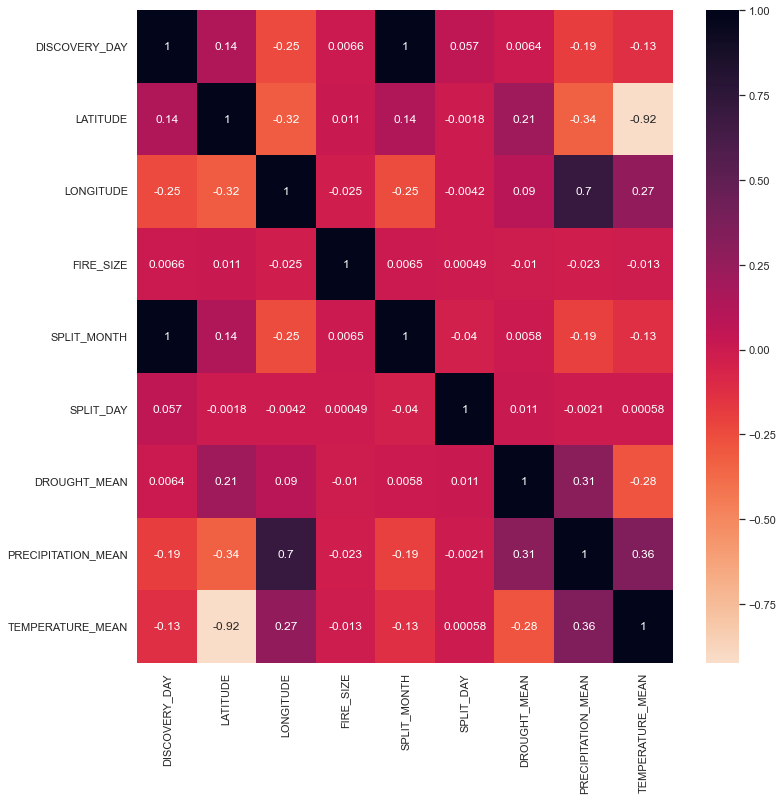

In [144]:
plt.figure(figsize=(12,12))
sns.heatmap(fires_model.corr(), annot=True,center=0,cmap='rocket_r')
plt.show()

Les variables corrélées significativement sont :
- DISCOVERY_DAY et SPLIT_MONTH, ce qui est logique puisque SPLIT_MONTH est issue de DISCOVERY_DAY
- LATITUDE ET TEMPERATURE_MEAN (corrélé négativement): plus l'un augmente, plus l'autre baisse. La relation parait logique puisqu'en fonction de la position sur le globe, les températures diffèrent.
- LONGITUDE et PRECIPITATION_MEAN : plus l'un augmente, plus l'autre augmente. La relation parait logique puisqu'en fonction de la position sur le globe il y a plus ou moins de précipitation

In [148]:
# ANOVA pour la température moyenne
import statsmodels.api
result_tmp = statsmodels.formula.api.ols('TEMPERATURE_MEAN ~ STAT_CAUSE_DESCR', data=fires_model).fit()
table_tmp = statsmodels.api.stats.anova_lm(result_tmp)
table_tmp

df        sum_sq        mean_sq             F  PR(>F)
STAT_CAUSE_DESCR       12.0  9.579760e+06  798313.361254  13084.516172     0.0
Residual          1835567.0  1.119917e+08      61.012066           NaN     NaN

La p-value est inférieure à 0.05% donc il existe une relation entre les variables.  
Interprétation Fisher :

In [149]:
# ANOVA pour la précipitation moyenne
result_pcp = statsmodels.formula.api.ols('PRECIPITATION_MEAN ~ STAT_CAUSE_DESCR', data=fires_model).fit()
table_pcp = statsmodels.api.stats.anova_lm(result_pcp)
table_pcp

df        sum_sq       mean_sq            F  PR(>F)
STAT_CAUSE_DESCR       12.0  4.199398e+05  34994.980141  25109.65392     0.0
Residual          1835567.0  2.558205e+06      1.393686          NaN     NaN

La p-value est inférieure à 0.05% donc il existe une relation entre les variables.  
Interprétation Fisher :

In [150]:
# ANOVA pour l'indice de sécheresse moyen
result_dro = statsmodels.formula.api.ols('DROUGHT_MEAN ~ STAT_CAUSE_DESCR', data=fires_model).fit()
table_dro = statsmodels.api.stats.anova_lm(result_dro)
table_dro

df        sum_sq      mean_sq            F  PR(>F)
STAT_CAUSE_DESCR       12.0  1.028997e+05  8574.975910  1707.498666     0.0
Residual          1835567.0  9.218129e+06     5.021952          NaN     NaN

La p-value est inférieure à 0.05% donc il existe une relation entre les variables.  
Interprétation Fisher : plus faible que les 2 précédents

In [151]:
# Analyse du type de données afin de séparer les variables numériques et catégorielles
#fires_model.info()
print(fires_model.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835580 entries, 0 to 1880464
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   STAT_CAUSE_DESCR    object 
 1   FIRE_SIZE_CLASS     object 
 2   STATE               object 
 3   DAY                 object 
 4   FIRE_YEAR           object 
 5   DISCOVERY_DAY       int64  
 6   LATITUDE            float64
 7   LONGITUDE           float64
 8   FIRE_SIZE           float64
 9   SPLIT_MONTH         int64  
 10  SPLIT_DAY           int64  
 11  DROUGHT_MEAN        float64
 12  PRECIPITATION_MEAN  float64
 13  TEMPERATURE_MEAN    float64
 14  CLIMAT              object 
 15  concat_state_year   object 
dtypes: float64(6), int64(3), object(7)
memory usage: 238.1+ MB
None


In [152]:
# Variables catégorielles
cat_var = fires_model.select_dtypes(include=[object])
print(cat_var.shape)

# Variables numériques
num_var = fires_model.select_dtypes(include=[np.number])
print(num_var.shape)

# Vérification de la non perte de données
print(fires_model.shape)
print('Les dimensions sont conformes, aucune perte de données')

(1835580, 7)
(1835580, 9)
(1835580, 16)
Les dimensions sont conformes, aucune perte de données


Variables catégorielles

In [153]:
# Etude des variables catégorielles
cat_var.nunique()

STAT_CAUSE_DESCR       13
FIRE_SIZE_CLASS         7
STATE                  48
DAY                     7
FIRE_YEAR              24
CLIMAT                  5
concat_state_year    1126
dtype: int64

In [154]:
# Suppression de la variable concat_state_year
fires_model = fires_model.drop('concat_state_year',axis=1)
fires_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835580 entries, 0 to 1880464
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   STAT_CAUSE_DESCR    object 
 1   FIRE_SIZE_CLASS     object 
 2   STATE               object 
 3   DAY                 object 
 4   FIRE_YEAR           object 
 5   DISCOVERY_DAY       int64  
 6   LATITUDE            float64
 7   LONGITUDE           float64
 8   FIRE_SIZE           float64
 9   SPLIT_MONTH         int64  
 10  SPLIT_DAY           int64  
 11  DROUGHT_MEAN        float64
 12  PRECIPITATION_MEAN  float64
 13  TEMPERATURE_MEAN    float64
 14  CLIMAT              object 
dtypes: float64(6), int64(3), object(6)
memory usage: 224.1+ MB


In [155]:
# Regroupement de la variable catégorielle STAT_CAUSE_DESCR par type de cause et remplacement numérique

def change_cause(cat):
    cause = 0
    natural_cause = ['Lightning']
    accidental_cause = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    criminal_cause = ['Arson']
    other_cause = ['Missing/Undefined','Miscellaneous']
    if cat in natural_cause:
        cause = 1
    elif cat in accidental_cause:
        cause = 2
    elif cat in criminal_cause:
        cause = 3
    else:
        cause = 4
    return cause
     

cat_var['CAUSE'] = cat_var['STAT_CAUSE_DESCR'].apply(lambda x: change_cause(x))
cat_var = cat_var.drop(['STAT_CAUSE_DESCR','concat_state_year'],axis=1)
cat_var.head()

FIRE_SIZE_CLASS STATE        DAY FIRE_YEAR        CLIMAT  CAUSE
0               A    CA  Wednesday      2005  mediteraneen      4
1               A    CA  Wednesday      2004  mediteraneen      1
2               A    CA     Monday      2004  mediteraneen      2
3               A    CA     Monday      2004  mediteraneen      1
4               A    CA     Monday      2004  mediteraneen      1

In [156]:
# Import
from sklearn.preprocessing import LabelEncoder

# Instanciation
le = LabelEncoder()

# Encodage de la variable catégorielle FIRE_SIZE_CLASS
cat_var['FIRE_SIZE_CLASS'] = le.fit_transform(cat_var['FIRE_SIZE_CLASS'])

# Encodage de la variable catégorielle FIRE_SIZE_CLASS
cat_var['STATE'] = le.fit_transform(cat_var['STATE'])

# Encodage de la variable catégorielle DAY
cat_var['DAY'] = le.fit_transform(cat_var['DAY'])

# Encodage de la variable catégorielle DAY
cat_var['CLIMAT'] = le.fit_transform(cat_var['CLIMAT'])

In [157]:
# Reconstitution du DataFrame et renommage des colonnes
fires_model = pd.concat([cat_var, num_var], axis=1)
fires_model = fires_model.rename(columns={'SPLIT_DAY':'DAY_OF_MONTH', 'SPLIT_MONTH':'MONTH'})

Vérification outliers sur variables numériques

In [158]:
# Renommage des colonnes
fires_model = fires_model.rename(columns={'DAY':'DAY_OF_WEEK','DISCOVERY_DAY':'DAY_OF_YEAR'})

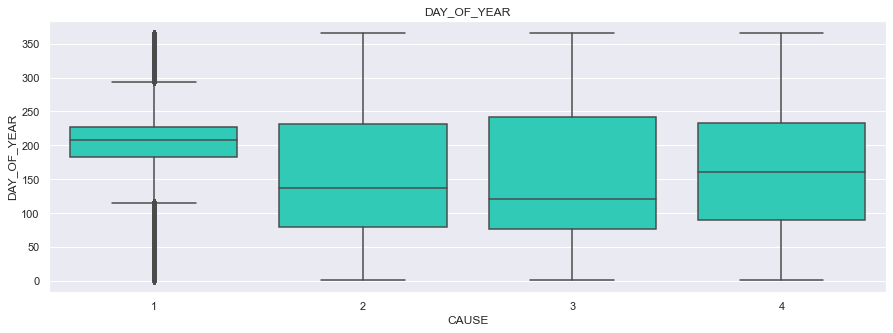

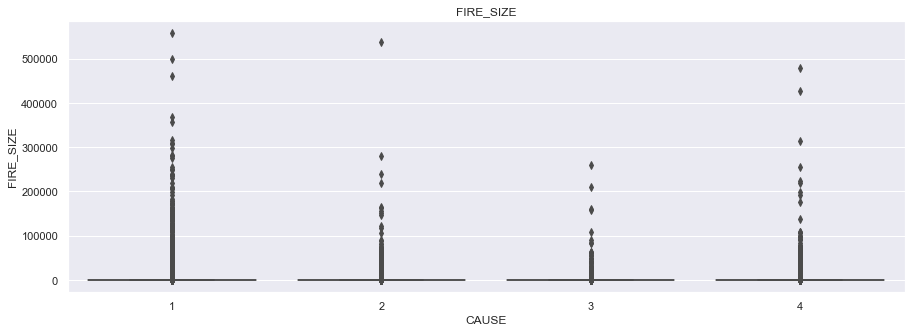

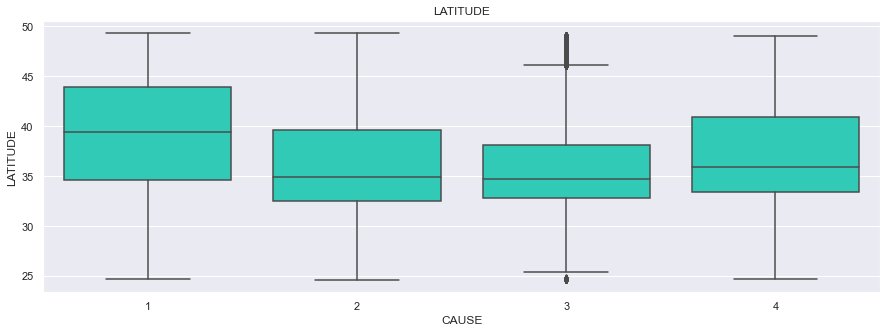

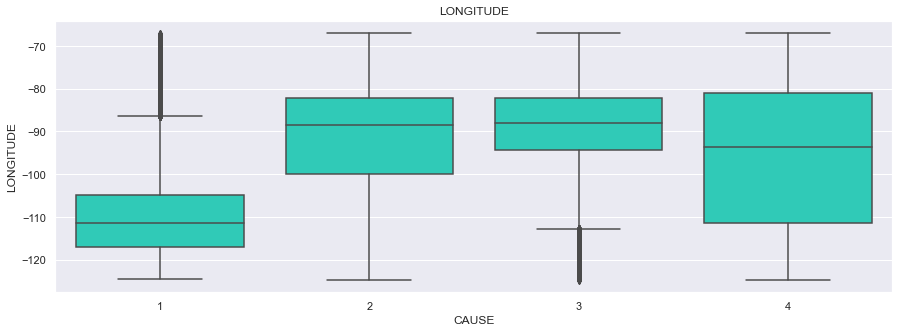

In [159]:
#En statistique, une valeur aberrante (ou outlier en anglais) est une observation qui est "distante" des autres valeurs de la même variable, c'est-à-dire qu'elle contraste grandement avec le reste des valeurs mesurées.
#Une valeur aberrante peut être due à une variabilité inhérente au phénomène observé ou peut aussi indiquer une erreur expérimentale.
#C'est pourquoi elles sont parfois exclues des données.

Col = ['DAY_OF_YEAR', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE']

for i in Col:
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    sns.boxplot(y=fires_model[i], x=fires_model['CAUSE'], ax=axs, color='#16E4CA')
    plt.title(i)

In [160]:
print('LATITUTE ET LONGITUTE: cela peut varier considerablement, aucun changement ou supression des données')

print('DAY_OF_YEAR: cela reste entre 0 et 365 jours, donc c est cohérent')
print('\n')
print('Par contre on voit des outlier marquants sur FIRE_SIZE')
      
print('Quantité outliers FIRE_SIZE:' , fires_model['FIRE_SIZE'][fires_model['FIRE_SIZE']>400000].shape, 'vs', fires_model['FIRE_SIZE'].shape, 'en total')


LATITUTE ET LONGITUTE: cela peut varier considerablement, aucun changement ou supression des données
DAY_OF_YEAR: cela reste entre 0 et 365 jours, donc c est cohérent


Par contre on voit des outlier marquants sur FIRE_SIZE
Quantité outliers FIRE_SIZE: (6,) vs (1835580,) en total


In [161]:
#supression outliers FIRE_SIZE

fires_model = fires_model[fires_model['FIRE_SIZE']<400000]

fires_model.shape

(1835574, 15)

In [162]:
fires_model

FIRE_SIZE_CLASS  STATE  DAY_OF_WEEK FIRE_YEAR  CLIMAT  CAUSE  \
0                      0      3            6      2005       2      4   
1                      0      3            6      2004       2      1   
2                      0      3            1      2004       2      2   
3                      0      3            1      2004       2      1   
4                      0      3            1      2004       2      1   
...                  ...    ...          ...       ...     ...    ...   
1880460                0      3            2      2015       2      4   
1880461                0      3            1      2015       2      4   
1880462                0      3            2      2015       2      4   
1880463                1      3            6      2015       2      4   
1880464                0      3            2      2015       2      4   

         DAY_OF_YEAR   LATITUDE   LONGITUDE  FIRE_SIZE  MONTH  DAY_OF_MONTH  \
0                 33  40.036944 -121.005833       0.10      2             2   
1                133  38.933056 -120.404444       0.25      5            12   
2                152  38.984167 -120.735556       0.10      5            31   
3                180  38.559167 -119.913333       0.10      6            28   
4                180  38.559167 -119.933056       0.10      6            28   
...              ...        ...         ...        ...    ...           ...   
1880460          269  40.481637 -122.389375       0.01      9            26   
1880461          278  37.617619 -120.938570       0.20     10             5   
1880462          122  37.617619 -120.938570       0.10      5             2   
1880463          287  37.672235 -120.898356       2.00     10            14   
1880464           73  34.263217 -116.830950       0.10      3            14   

         DROUGHT_MEAN  PRECIPITATION_MEAN  TEMPERATURE_MEAN  
0                3.08                2.51             59.92  
1               -0.99                1.81             60.25  
2               -0.99                1.81             60.25  
3               -0.99                1.81             60.25  
4               -0.99                1.81             60.25  
...               ...                 ...               ...  
1880460         -4.80                1.25             61.86  
1880461         -4.80                1.25             61.86  
1880462         -4.80                1.25             61.86  
1880463         -4.80                1.25             61.86  
1880464         -4.80                1.25             61.86  

[1835574 rows x 15 columns]

# PCA

In [163]:
# Import des packages
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [164]:
# Séparation des données d'entrainement et des données cibles
data = fires_model.drop(['CAUSE'], axis=1)
target = fires_model['CAUSE']

In [165]:
# Création instance StandardScaler
scaler = StandardScaler()
# Normalisation des données
norm = scaler.fit_transform(data)

# Création de l'instance PCA
model_pca = PCA()

# Stockage de la représentation de data normalisée obtenue par Analyse en Composantes Principales dans un array nommé coord_acp
coord_acp = model_pca.fit_transform(norm)

In [166]:
# Part de variance expliquée pour chaque composante => valeurs propres de la matrice. 
# Elles nous indiquent la part de l'ensemble de l'information contenue sur chaque facteur.
var_expl = model_pca.explained_variance_
print(var_expl)

[3.22199474e+00 2.02728196e+00 1.53597335e+00 1.18880967e+00
 1.14887437e+00 1.00614286e+00 9.97811007e-01 8.88003722e-01
 7.63387370e-01 6.12081410e-01 3.66212143e-01 1.83926262e-01
 5.94762749e-02 3.24903433e-05]


In [167]:
# Dimension de la variance expliquée
var_expl.shape

(14,)

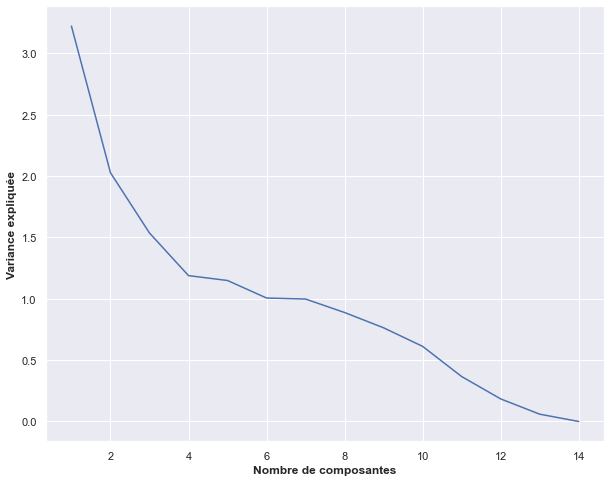

In [168]:
# Graphique de la variance expliquée en fonction du nombre de facteurs
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,15), var_expl)
plt.xlabel('Nombre de composantes', weight='bold') # Nombre de facteurs
plt.ylabel('Variance expliquée', weight='bold') # Valeurs propres
plt.show()

In [169]:
# Ratio de la variance expliquée pour chacune des composantes
ratio_var = model_pca.explained_variance_ratio_ 
ratio_var

array([2.30142356e-01, 1.44805776e-01, 1.09712322e-01, 8.49149303e-02,
       8.20624103e-02, 7.18673078e-02, 7.12721759e-02, 6.34288027e-02,
       5.45276396e-02, 4.37200769e-02, 2.61579960e-02, 1.31375830e-02,
       4.24830303e-03, 2.32073755e-06])

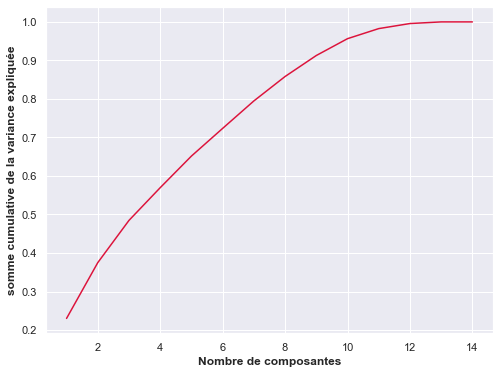

In [170]:
# Graphique de la somme cumulative représentant le ratio de la variance expliquée en fonction du nombre de composantes
plt.figure(figsize=(8,6))

plt.plot(np.arange(1, 15), np.cumsum(ratio_var), color = 'crimson')

plt.xlabel('Nombre de composantes', weight='bold') # Nombre de facteurs
plt.ylabel('somme cumulative de la variance expliquée', weight='bold')

plt.show()

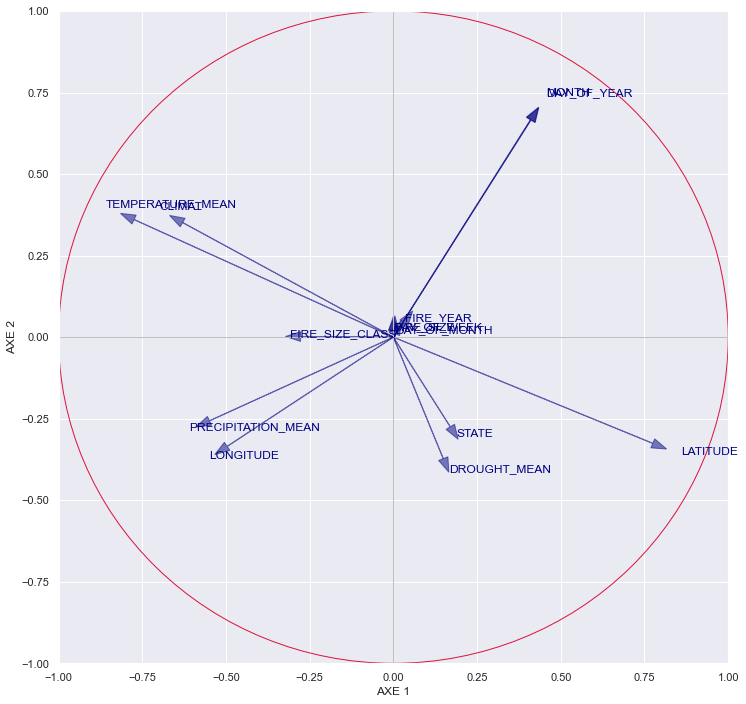

In [171]:
sqrt_eigval = np.sqrt(model_pca.explained_variance_)
corvar = np.zeros((14, 14))
for k in range(14):
    corvar[:, k] = model_pca.components_[k, :] * sqrt_eigval[k]
# corvar

fig, axes = plt.subplots(figsize=(12, 12))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# affichage des étiquettes (noms des variables)
for j in range(14):
    plt.annotate(data.columns[j], (corvar[j, 0], corvar[j, 1]), color='navy')
    plt.arrow(0, 0, corvar[j, 0]*0.9, corvar[j, 1]*0.9, alpha=0.5, head_width=0.03, color='navy')

# ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0, 0), 1, color='crimson', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.show()

Un cercle de corrélation permet de lire la corrélation de chaque variable avec les axes 1 et 2.  
Si une flèche est courte, cela veut dire que la variable est peu corrélée à l'axe, elle est mal représentée, on a perdu une très grande partie de l'information que contenait cette variable. Il ne faut donc pas l'interpréter.  
Pour les flèches plus longues, si elles sont verticales ou horizontales par rapport aux axes, cela veut dire qu'il existe une très forte corrélation.  
Si la pointe est proche du cercle, la variable est très bien représentée dans le plan défini par les axes 1 et 2.

Dans le cercle des corrélations nous voyons bien qu'il n'y a pas de très forte corrélation bien représentée. Certaines variables sont bien représentées mais peu corrélées aux axes 1 et 2.
La variable FIRE_SIZE_CLASS est très fortement corrélées à l'axe 1 mais n'est pas représentatives.

In [172]:
# Création d'un dataframe avec uniquement les 2 premières coordonnées de PCA
acp_data = pd.DataFrame({'axe1':coord_acp[:,0], 'axe2':coord_acp[:,1], 'target':target})

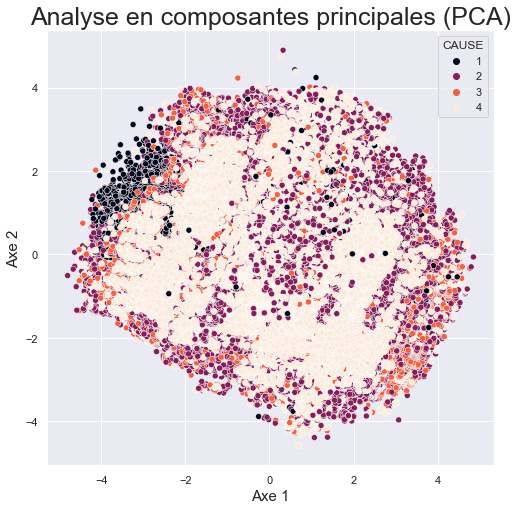

In [173]:
# Représentation graphique du nuage de points
plt.figure(figsize=(8,8))

sns.scatterplot(x='axe1', y='axe2', hue= target, data=acp_data, palette='rocket')

plt.title('Analyse en composantes principales (PCA)', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

# T-SNE

In [174]:
import warnings
warnings.filterwarnings('ignore')

L'objectif de T-SNE est similaire à celui de l'ACP : représenter nos données dans une dimension plus petite.  
Cependant, le principe de T-SNE est différent :  
Il construit une nouvelle représentation des données de manière à ce que les données proches dans la dimension d'origine aient une forte probabilité d'avoir des représentations proches dans la nouvelle dimension.

In [175]:
# Import
from sklearn.manifold import TSNE

In [176]:
# Création de l'instance T-SNE
tsne = TSNE(n_components=2)

# Import de la fonction random pour pouvoir sélectionner aléatoirement 100000 données du dataset normalisé
import random
norm_aleatoire = random.choices(norm, k=10000)
# Stockage de la représentation de data normalisée avec 1% des données intiales aléatoires afin de ne pas trop bloquer le lancement
# Pour mémoire : time 2 à 5min.
Coord_TSNE = tsne.fit_transform(norm_aleatoire)


In [177]:
# DataFrame tsne_df contenant les coordonnées Coord_TSNE ainsi que la variable target avec 10% des données initiales.

tsne_df = pd.DataFrame({'AXE 1': Coord_TSNE[:, 0], 'AXE 2': Coord_TSNE[:, 1], 'Target': target[10000]})

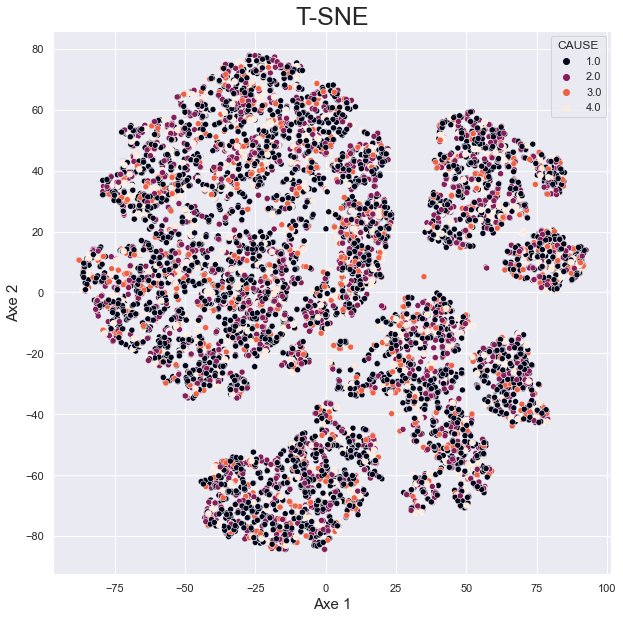

In [178]:
# Représentation graphique de 10% des données

plt.figure(figsize=(10,10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue= target, data=tsne_df, palette='rocket')

plt.title('T-SNE', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

### T-SNE + PCA

In [190]:
# Création d'une nouvelle isntance de TSNE
tsne_new = TSNE(n_components=2)

# Stockage des coordonnées du T-SNE sur celles de l'ACP avec 1% des données
# Pour mémoire : time > 13 min. 
coord_acp_aleatoire = random.choices(coord_acp, k=10000)
Coord_TSNE_ACP = tsne_new.fit_transform(coord_acp_aleatoire)

In [191]:
# Création d'un nouveau DataFrame tsne_acp_df contenant Coord_TSNE_ACP et la variable target
tsne_acp_df = pd.DataFrame({'AXE 1': Coord_TSNE_ACP[:, 0], 'AXE 2': Coord_TSNE_ACP[:, 1], 'Target': target[:10000]})

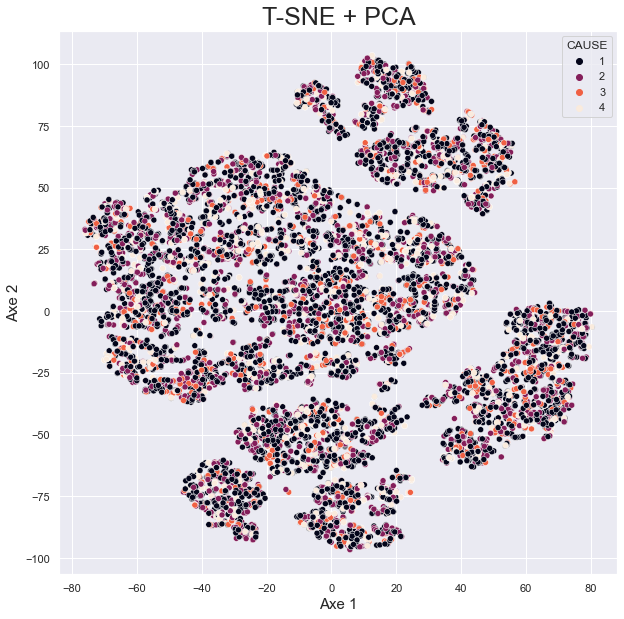

In [192]:
# Représentation graphique
plt.figure(figsize=(10,10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue= target, data=tsne_acp_df, palette='rocket')

plt.title('T-SNE + PCA', fontsize=25)
plt.xlabel('Axe 1', fontsize=15)
plt.ylabel('Axe 2', fontsize=15)

plt.show()

## K-MEANS

In [110]:
# import
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

fires_model_for_kmeans = fires_model[['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS','STATE','DAY_OF_WEEK','FIRE_YEAR','CLIMAT','FIRE_SIZE','MONTH','TEMPERATURE_MEAN']]

# Standardisation des données
sc = StandardScaler()
fires_model_norm = sc.fit_transform(fires_model_for_kmeans)

In [111]:
fires_model_for_kmeans

LONGITUDE   LATITUDE  FIRE_SIZE_CLASS  STATE  DAY_OF_WEEK FIRE_YEAR  \
0       -121.005833  40.036944                0      3            6      2005   
1       -120.404444  38.933056                0      3            6      2004   
2       -120.735556  38.984167                0      3            1      2004   
3       -119.913333  38.559167                0      3            1      2004   
4       -119.933056  38.559167                0      3            1      2004   
...             ...        ...              ...    ...          ...       ...   
1880460 -122.389375  40.481637                0      3            2      2015   
1880461 -120.938570  37.617619                0      3            1      2015   
1880462 -120.938570  37.617619                0      3            2      2015   
1880463 -120.898356  37.672235                1      3            6      2015   
1880464 -116.830950  34.263217                0      3            2      2015   

         CLIMAT  FIRE_SIZE  MONTH  TEMPERATURE_MEAN  
0             2       0.10      2             59.92  
1             2       0.25      5             60.25  
2             2       0.10      5             60.25  
3             2       0.10      6             60.25  
4             2       0.10      6             60.25  
...         ...        ...    ...               ...  
1880460       2       0.01      9             61.86  
1880461       2       0.20     10             61.86  
1880462       2       0.10      5             61.86  
1880463       2       2.00     10             61.86  
1880464       2       0.10      3             61.86  

[1835574 rows x 10 columns]

In [112]:
fires_model_norm_kmeans = pd.DataFrame(fires_model_norm, columns=['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS','STATE','DAY_OF_WEEK','FIRE_YEAR','CLIMAT','FIRE_SIZE','MONTH','TEMPERATURE_MEAN'])
fires_model_norm_kmeans

LONGITUDE  LATITUDE  FIRE_SIZE_CLASS     STATE  DAY_OF_WEEK  \
0        -1.673746  0.588879        -1.017909 -1.223096     1.537075   
1        -1.634516  0.381263        -1.017909 -1.223096     1.537075   
2        -1.656115  0.390876        -1.017909 -1.223096    -0.995068   
3        -1.602480  0.310944        -1.017909 -1.223096    -0.995068   
4        -1.603767  0.310944        -1.017909 -1.223096    -0.995068   
...            ...       ...              ...       ...          ...   
1835569  -1.763996  0.672515        -1.017909 -1.223096    -0.488640   
1835570  -1.669358  0.133861        -1.017909 -1.223096    -0.995068   
1835571  -1.669358  0.133861        -1.017909 -1.223096    -0.488640   
1835572  -1.666735  0.144133         0.194245 -1.223096     1.537075   
1835573  -1.401413 -0.497023        -1.017909 -1.223096    -0.488640   

         FIRE_YEAR    CLIMAT  FIRE_SIZE     MONTH  TEMPERATURE_MEAN  
0         0.199283 -0.761745  -0.033643 -1.338342          0.127473  
1         0.049926 -0.761745  -0.033554 -0.323073          0.168022  
2         0.049926 -0.761745  -0.033643 -0.323073          0.168022  
3         0.049926 -0.761745  -0.033643  0.015349          0.168022  
4         0.049926 -0.761745  -0.033643  0.015349          0.168022  
...            ...       ...        ...       ...               ...  
1835569   1.692858 -0.761745  -0.033696  1.030618          0.365854  
1835570   1.692858 -0.761745  -0.033583  1.369041          0.365854  
1835571   1.692858 -0.761745  -0.033643 -0.323073          0.365854  
1835572   1.692858 -0.761745  -0.032518  1.369041          0.365854  
1835573   1.692858 -0.761745  -0.033643 -0.999919          0.365854  

[1835574 rows x 10 columns]

In [113]:
# Création de l'instance KMeans
kmeans = KMeans(n_clusters=2)

# Ajustement 
kmeans.fit(fires_model_norm_kmeans)

# Prédictions
y_kmeans = kmeans.predict(fires_model_norm_kmeans)

In [114]:
# vecteur qui contient le numéro du groupe de chacune des données
labels = kmeans.labels_ 
labels


array([0, 0, 0, ..., 0, 0, 0])

In [115]:
# Coordonnées des clusters / liste des positions des K centroïdes
centroids = kmeans.cluster_centers_
centroids

array([[-0.58099883,  0.89594729, -0.30266969,  0.05933273, -0.00153731,
         0.02665823, -0.88387654,  0.00589515,  0.22976736, -0.90549142],
       [ 0.44730907, -0.68978684,  0.23302439, -0.04568007,  0.00118357,
        -0.02052408,  0.68049361, -0.00453866, -0.17689713,  0.69713483]])

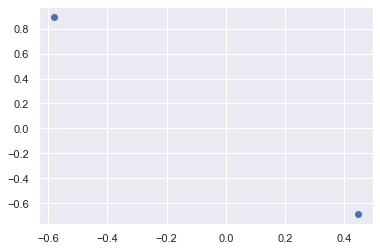

In [116]:
# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1])
plt.show()

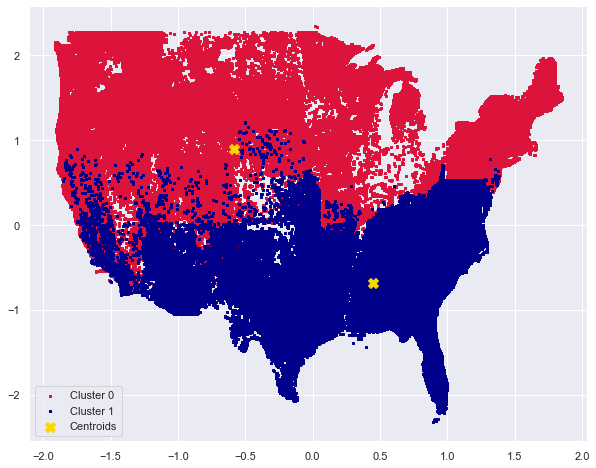

In [117]:
plt.figure(figsize=(10, 8))

plt.scatter(fires_model_norm_kmeans[y_kmeans==0].iloc[:,0], fires_model_norm_kmeans[y_kmeans==0].iloc[:,1],
            s=5, c='crimson', label='Cluster 0', marker=',')

plt.scatter(fires_model_norm_kmeans[y_kmeans==1].iloc[:,0], fires_model_norm_kmeans[y_kmeans==1].iloc[:,1],
            s=5, c='darkblue', label='Cluster 1', marker=',')

plt.scatter(centroids[:, 0],centroids[:, 1], s=100, c='gold', label='Centroids', marker='X')

plt.legend(loc='best')

plt.show()

### Choix du nombre de clusters optimal méthode 1

In [ ]:
# Import de la fonction permettant de calculer la distance entre les observations de dimension quelconque
from scipy.spatial.distance import cdist

# Pour mémoire, time > 15 min pour (1,20) et > 176min pour (1,60).
# Liste de k à tester
list_n_clusters = list(range(1,20))

# Initialisation de la liste de distorsions
distorsions = []
# Calcul des distorsions pour les différents modèles
for n_clusters in list_n_clusters :
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(fires_model_norm_kmeans)
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(fires_model_norm_kmeans, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(fires_model_norm_kmeans, axis = 0))


ValueError: x and y must have same first dimension, but have shapes (19,) and (14,)

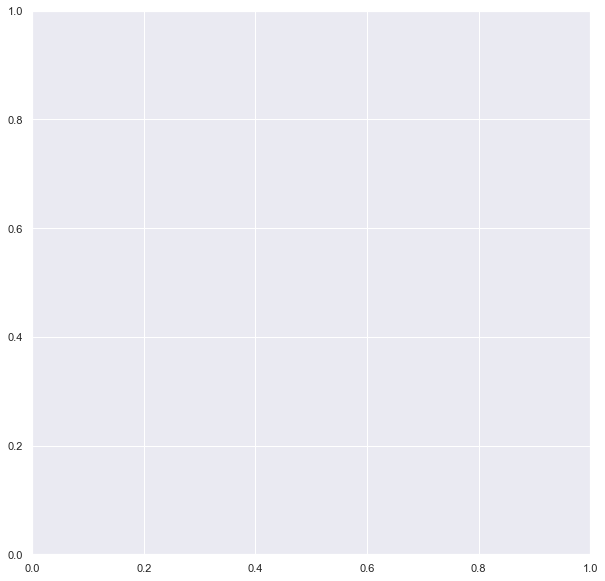

In [119]:
# Représentation grahpique des distorsions en fonction du nombre de clusters
plt.figure(figsize=(10,10))

plt.plot(list_n_clusters, distorsions, marker='x', c='crimson')

plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal', fontsize=15, weight='semibold')

plt.show()

Nous voyons clairement qu'il n'y a pas de coude dans la courbe et il est donc difficle de repérer le k optimal. Le k optimal peut être de 3 comme de 5 ou 10.

### Choix du nombre de clusters optimal méthode 2

Text(0, 0.5, 'K-Means inertia')

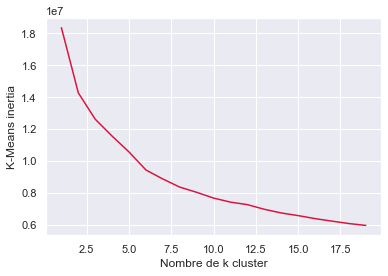

In [ ]:
# Cette méthode consiste à tracer la variation expliquée en fonction du nombre de clusters, 
# et à choisir le coude de la courbe comme le nombre de clusters à utiliser
# Pour mémoire : time > 15min.
L = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(fires_model_norm_kmeans)
    L.append(kmeans.inertia_)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 20), L, c='crimson')
plt.xlabel('Nombre de k cluster')
plt.ylabel('K-Means inertia')

### Test du nombre de variables et de clusters à prendre en compte dans le modèle

In [ ]:
fires_k_model = fires_model[['FIRE_SIZE_CLASS', 'STATE', 'DAY', 'CAUSE', 'FIRE_YEAR',
       'DISCOVERY_DAY', 'FIRE_SIZE', 'MONTH', 'DAY_OF_MONTH']]

KeyError: "['DAY', 'DISCOVERY_DAY'] not in index"

### K-Means avec 2 clusters et 3 variables

In [ ]:
# Conserver toutes les variables normalisées y compris Alaska, Hawai et Puerto Rico

# Fonction pour tester les colonnes du DF
def model_kmeans0(dataframe) :
    for col in fires_k_model :
        fires_model_for_kmeans0 = fires_model[['LONGITUDE', 'LATITUDE', col]]

        # Standardisation des données
        sc = StandardScaler()
        fires_model_norm0 = sc.fit_transform(fires_model_for_kmeans0)

        # Création DF
        fires_model_norm_kmeans0 = pd.DataFrame(fires_model_norm0, columns=['LONGITUDE','LATITUDE',col])

        # Création de l'instance KMeans
        kmeans0 = KMeans(n_clusters=2)
        kmeans0.fit(fires_model_norm_kmeans0)
        y_kmeans0 = kmeans0.predict(fires_model_norm_kmeans0)

        # vecteur qui contient le numéro du groupe de chacune des données
        labels0 = kmeans0.labels_ 

        # Coordonnées des clusters / liste des positions des K centroïdes
        centroids0 = kmeans0.cluster_centers_

        # Graphique des centroïdes
        plt.scatter(centroids0[:, 0],centroids0[:, 1])
        plt.title(col)
        plt.show()

        # Représentation graphique K-means
        plt.figure(figsize=(15, 10))

        plt.scatter(fires_model_norm_kmeans0[y_kmeans0==0].iloc[:,0], fires_model_norm_kmeans0[y_kmeans0==0].iloc[:,1], s=5, alpha=0.5, c='#0450B4', label='Cluster 0')

        plt.scatter(fires_model_norm_kmeans0[y_kmeans0==1].iloc[:,0], fires_model_norm_kmeans0[y_kmeans0==1].iloc[:,1], s=5, alpha=0.5, c='#FEA802', label='Cluster 1')
        

        plt.scatter(centroids0[:, 0],centroids0[:, 1], s=100, c='black', label='Centroids', marker='X')

        plt.legend(loc='best', markerscale=2)
        plt.show()




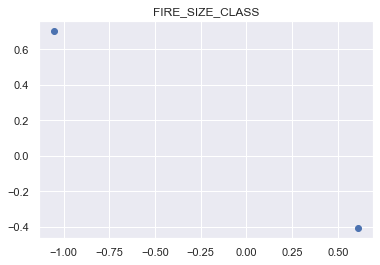

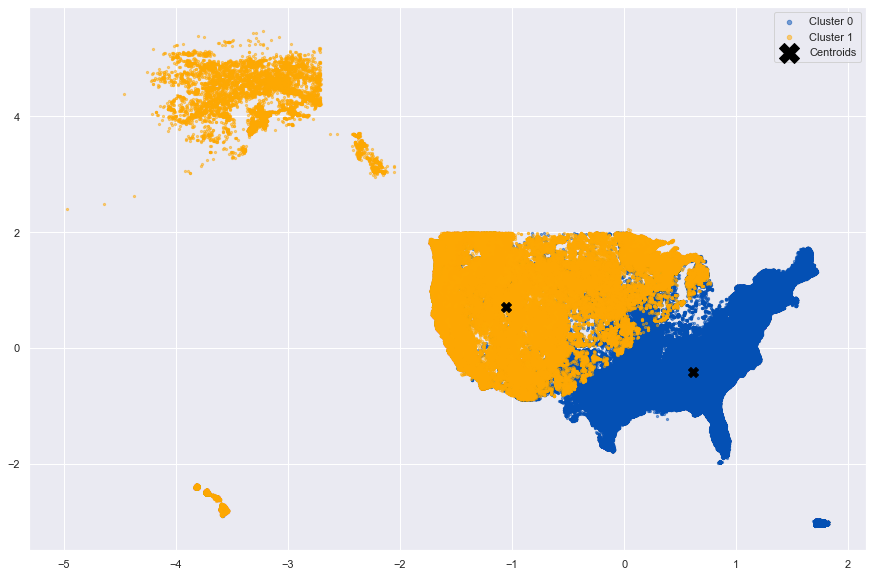

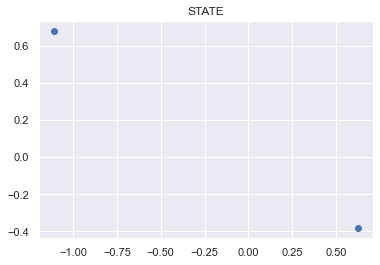

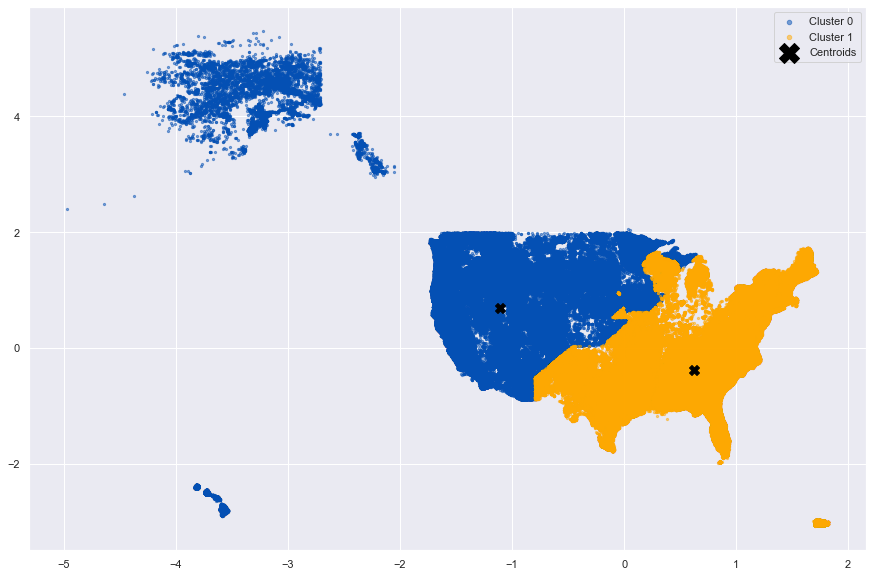

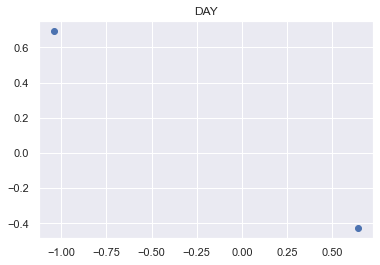

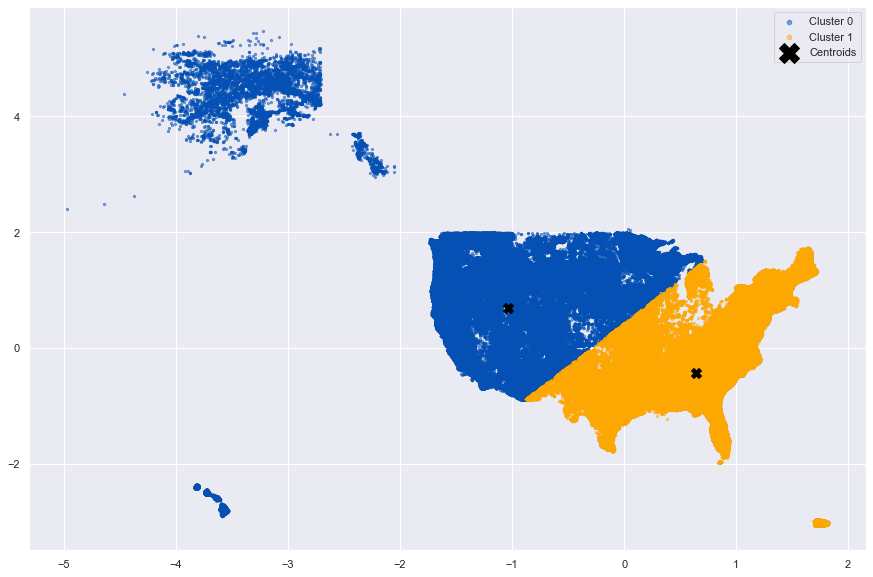

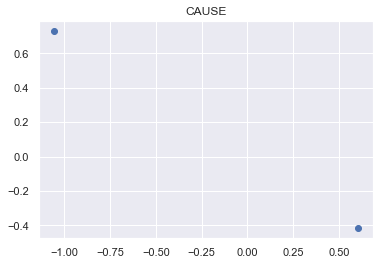

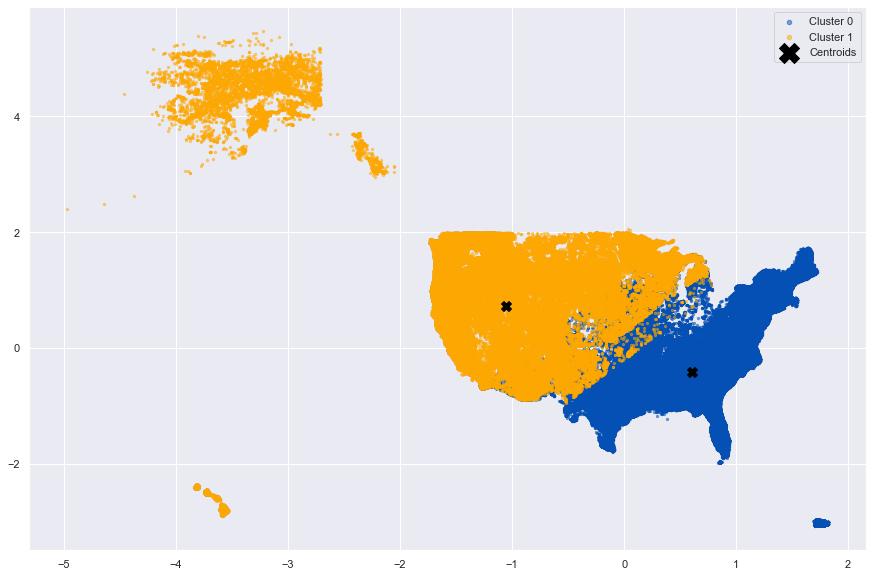

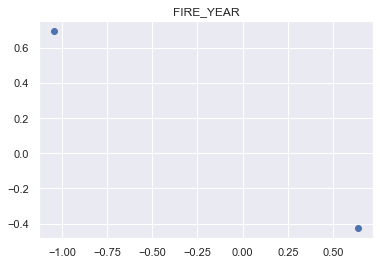

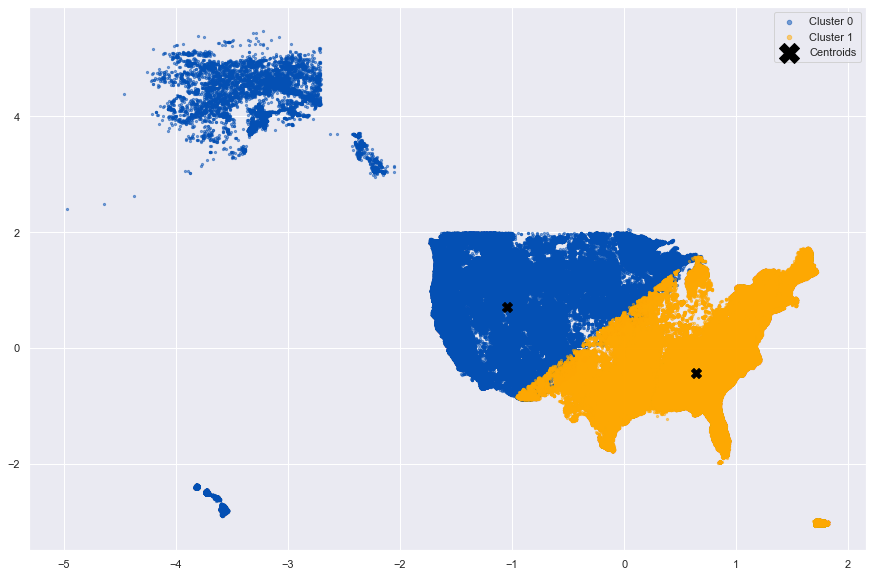

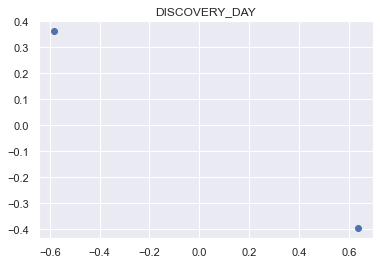

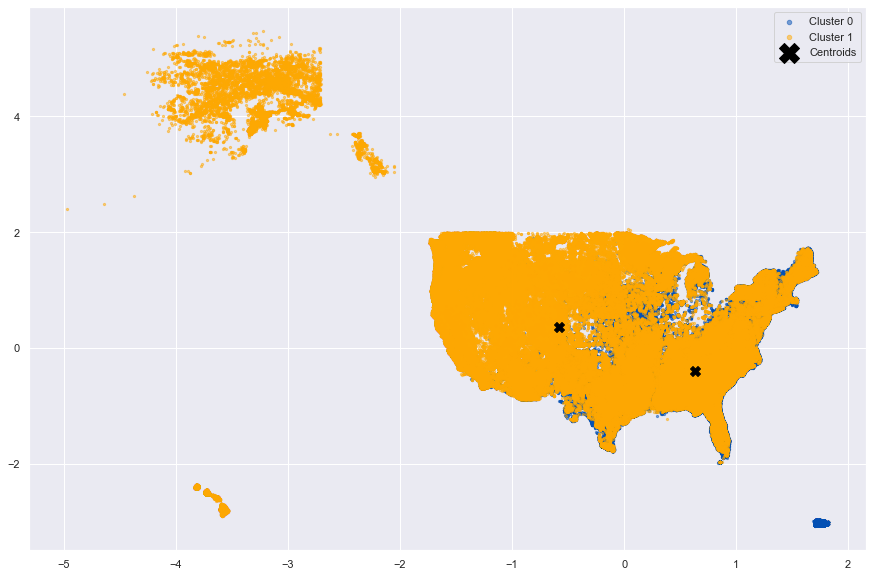

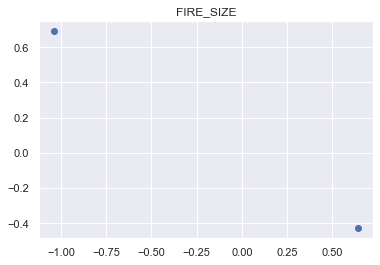

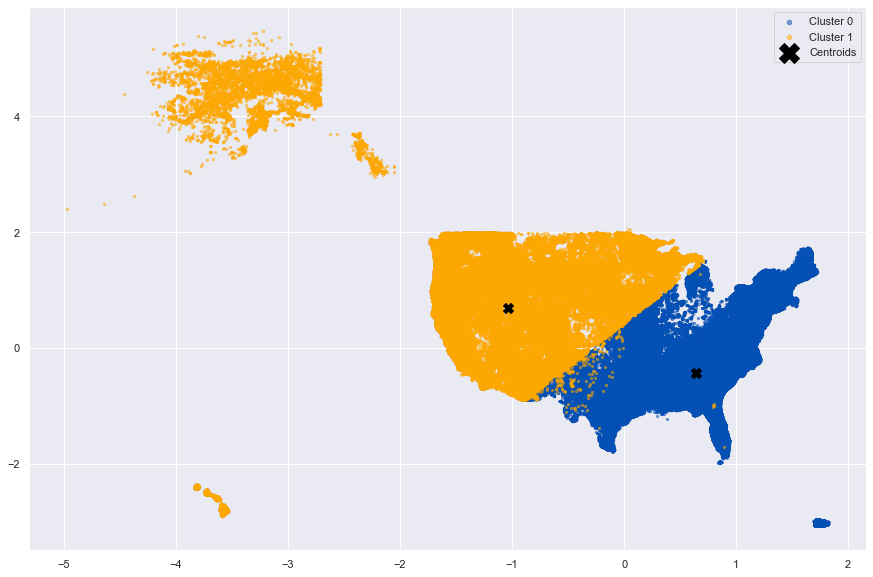

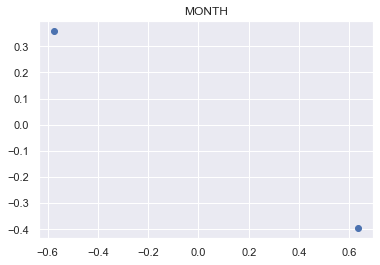

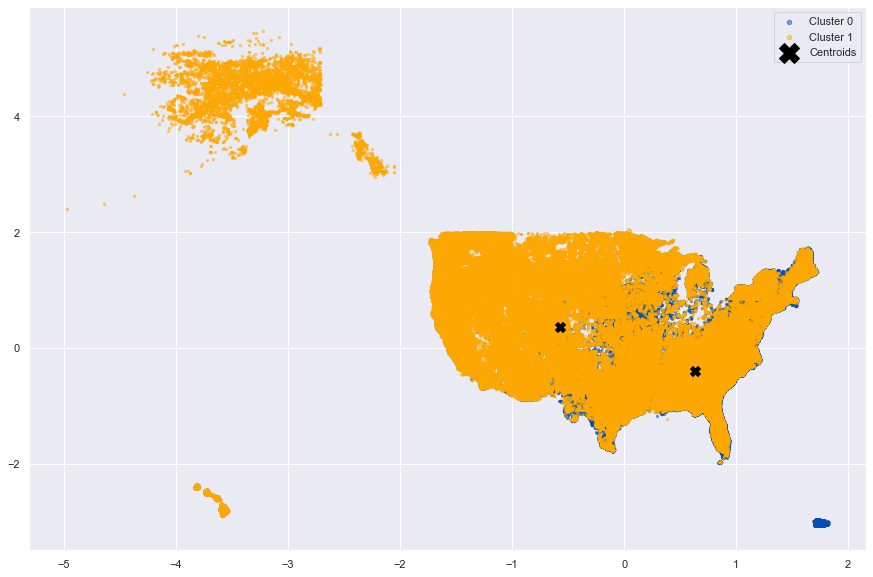

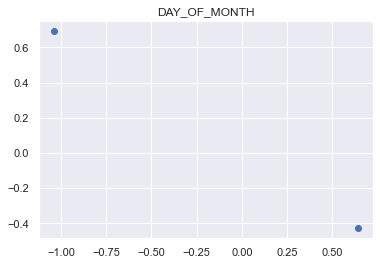

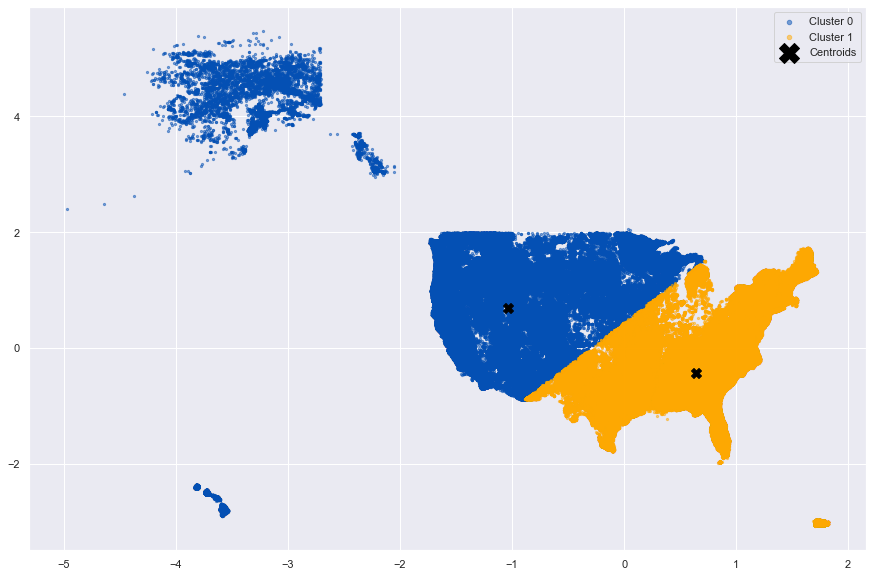

In [ ]:
# Pour mémoire : time > 5min.
model_kmeans0(fires_k_model.columns)

### K-Means avec 10 clusters et 3 variables

In [ ]:
# Conserver toutes les variables normalisées y compris Alaska, Hawai et Puerto Rico

# Fonction pour tester les colonnes du DF
def model_kmeans2(dataframe) :
    for col in fires_k_model :
        fires_model_for_kmeans2 = fires_model[['LONGITUDE', 'LATITUDE', col]]

        # Standardisation des données
        sc = StandardScaler()
        fires_model_norm2 = sc.fit_transform(fires_model_for_kmeans2)

        # Création DF
        fires_model_norm_kmeans2 = pd.DataFrame(fires_model_norm2, columns=['LONGITUDE','LATITUDE',col])

        # Création de l'instance KMeans
        kmeans2 = KMeans(n_clusters=10)
        kmeans2.fit(fires_model_norm_kmeans2)
        y_kmeans2 = kmeans2.predict(fires_model_norm_kmeans2)

        # vecteur qui contient le numéro du groupe de chacune des données
        labels2 = kmeans2.labels_ 

        # Coordonnées des clusters / liste des positions des K centroïdes
        centroids2 = kmeans2.cluster_centers_

        # Graphique des centroïdes
        plt.scatter(centroids2[:, 0],centroids2[:, 1])
        plt.title(col)
        plt.show()

        # Représentation graphique K-means
        plt.figure(figsize=(15, 10))

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==0].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==0].iloc[:,1],
                s=5, alpha=0.5, c='#0450B4', label='Cluster 0')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==1].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==1].iloc[:,1],
                s=5, alpha=0.5, c='#FEA802', label='Cluster 1')
        
        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==2].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==2].iloc[:,1],
                s=5, alpha=0.5, c='#15A2A2', label='Cluster 2')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==3].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==3].iloc[:,1],
                s=5, alpha=0.5, c='#FE7434', label='Cluster 3')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==4].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==4].iloc[:,1],
                s=5, alpha=0.5, c='#6FB1A0', label='Cluster 4')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==5].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==5].iloc[:,1],
                s=5, alpha=0.5, c='#B4418E', label='Cluster 5')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==6].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==6].iloc[:,1],
                s=5, alpha=0.5, c='#EA515F', label='Cluster 6')
        
        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==7].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==7].iloc[:,1],
                s=5, alpha=0.5, c='#046DC8', label='Cluster 7')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==8].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==8].iloc[:,1],
                s=5, alpha=0.5, c='#0C5A5A', label='Cluster 8')

        plt.scatter(fires_model_norm_kmeans2[y_kmeans2==9].iloc[:,0], fires_model_norm_kmeans2[y_kmeans2==9].iloc[:,1],
                s=5, alpha=0.5, c='#D94A8C', label='Cluster 9')


        plt.scatter(centroids2[:, 0],centroids2[:, 1], s=100, c='black', label='Centroids', marker='X')

        plt.legend(loc='best')
        plt.show()




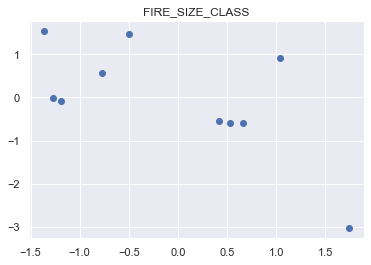

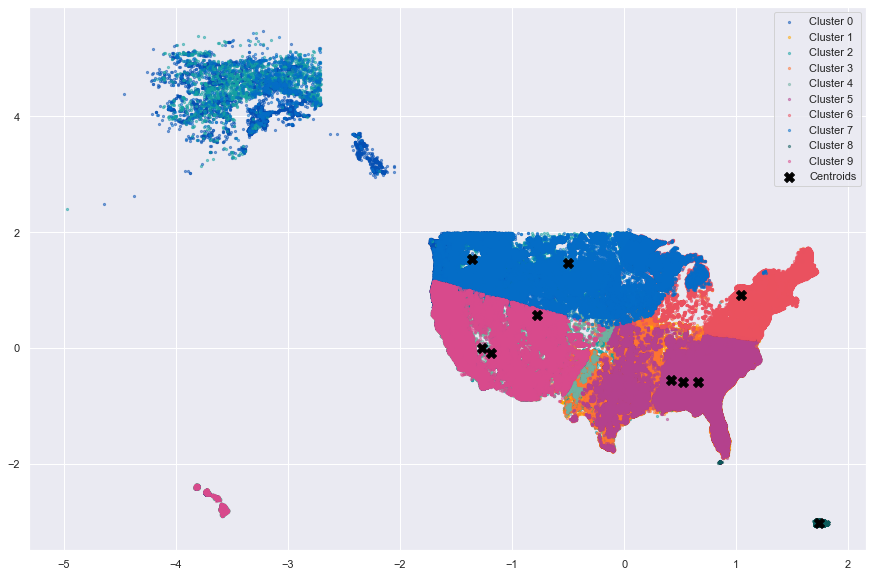

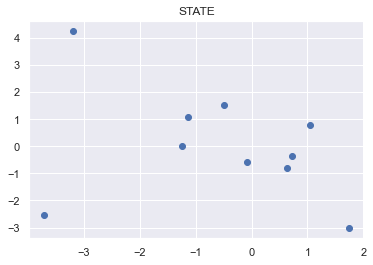

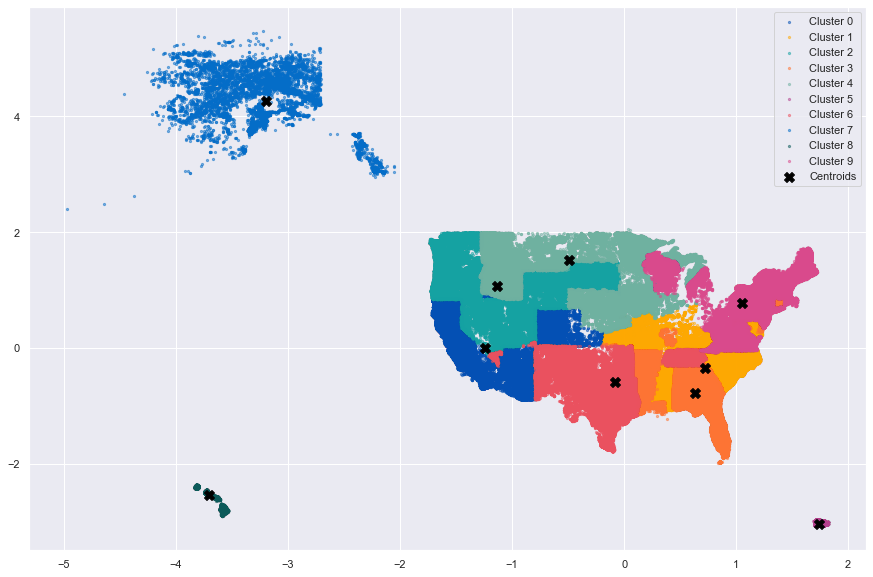

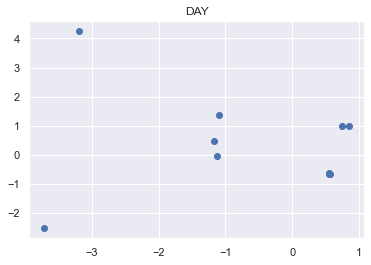

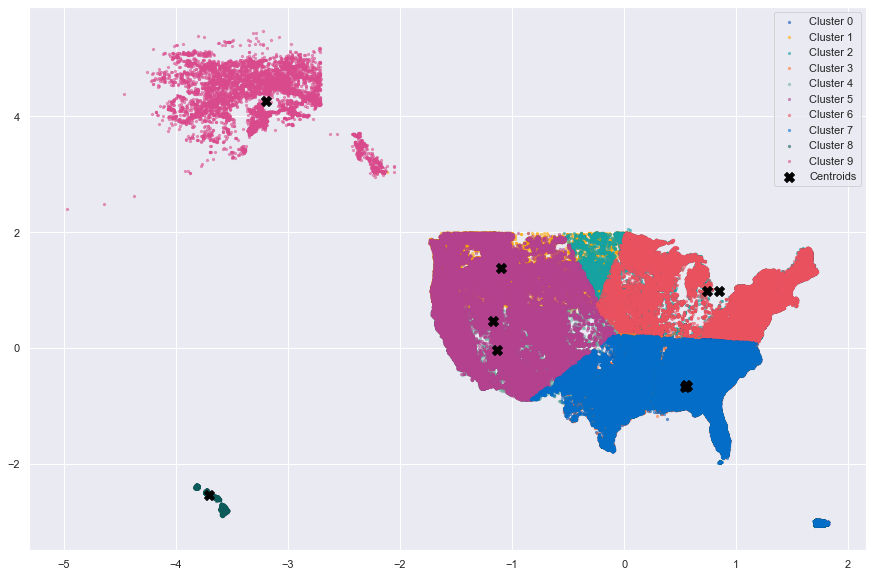

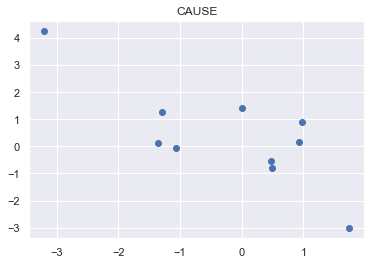

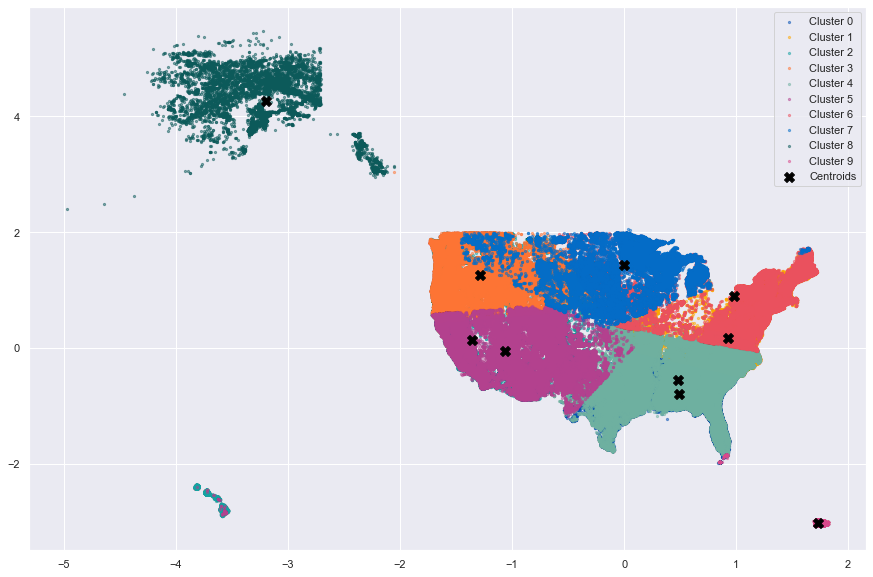

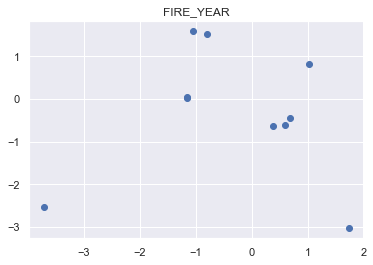

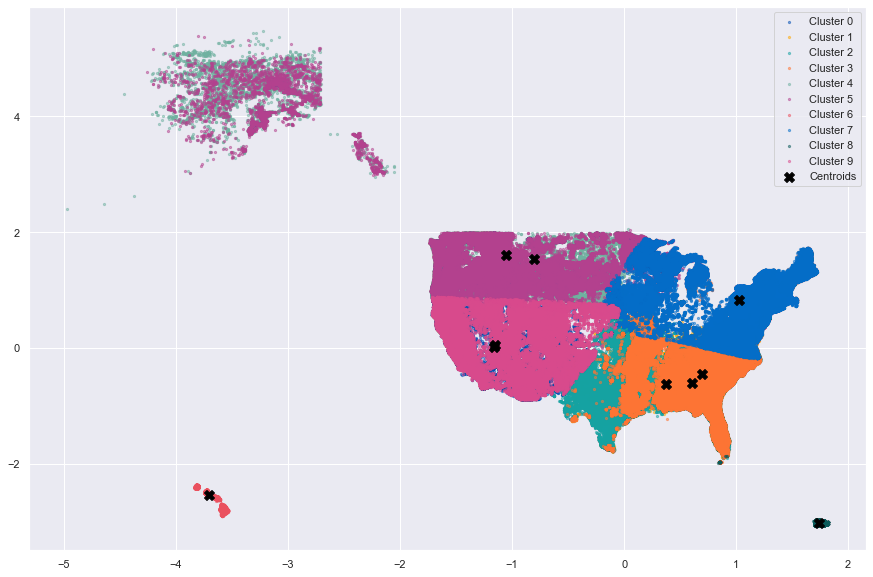

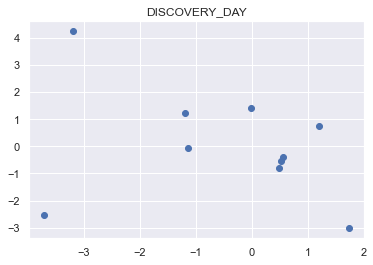

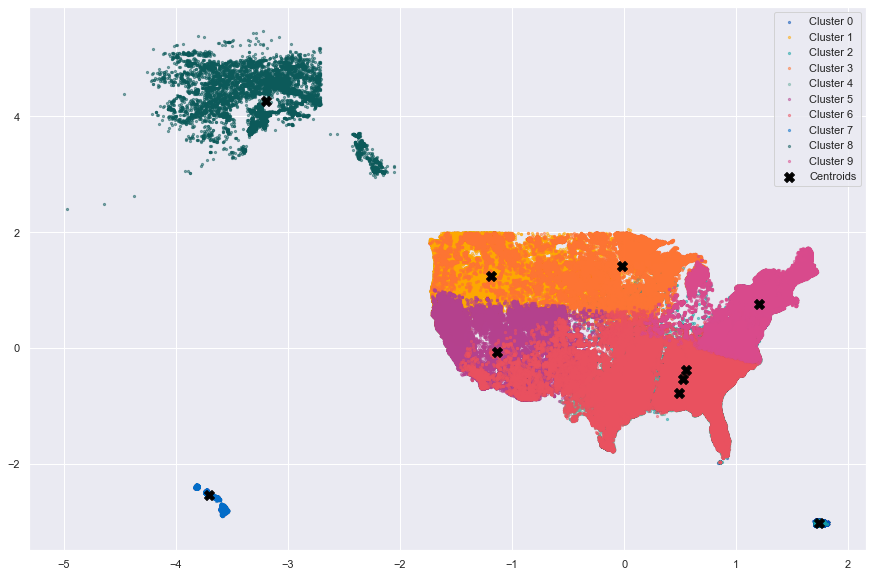

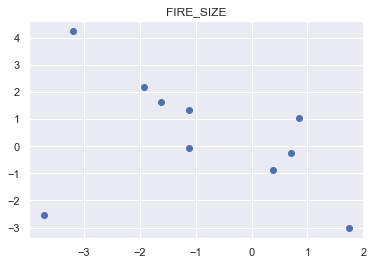

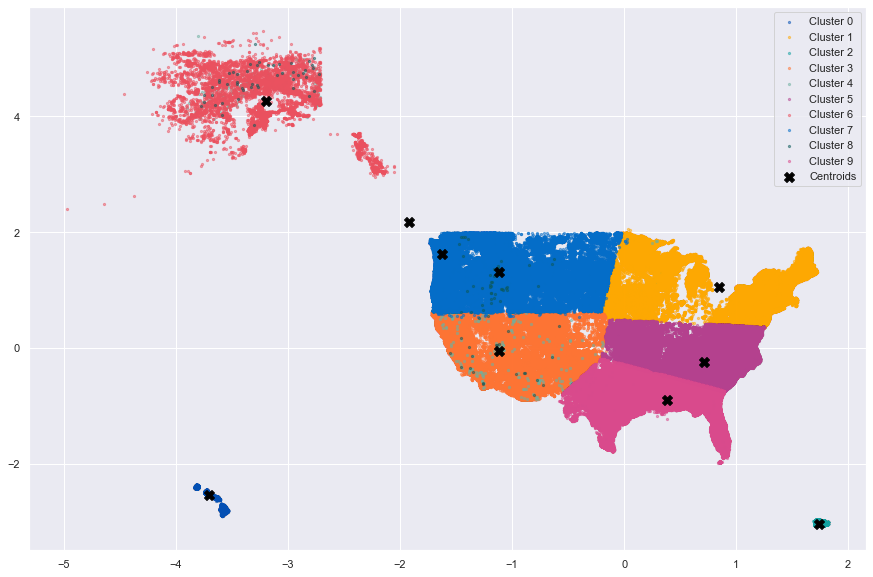

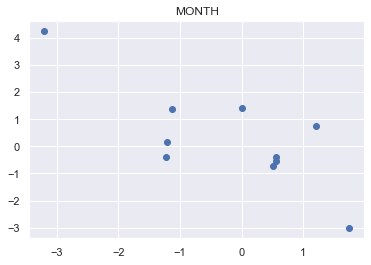

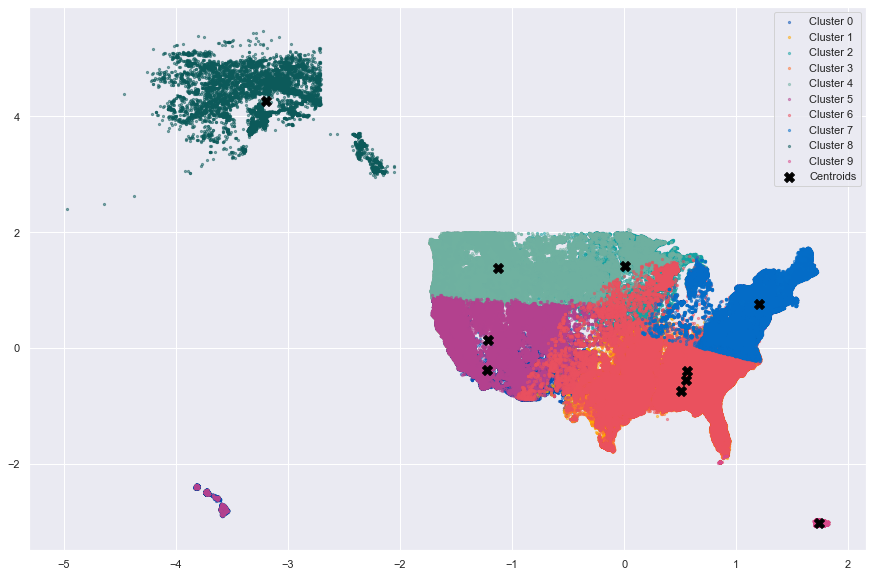

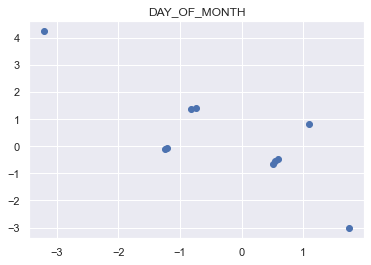

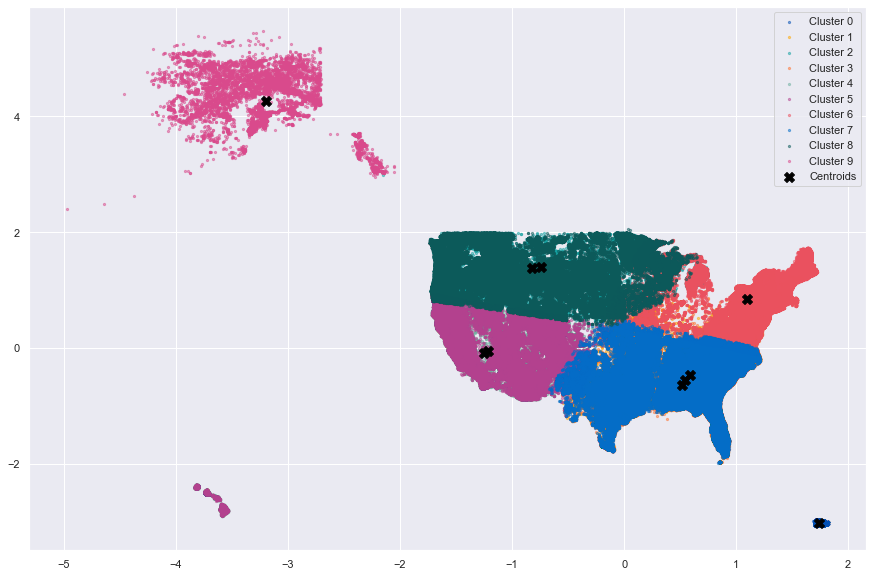

In [ ]:
# Pour mémoire : time > 13 min.
model_kmeans2(fires_k_model.columns)

### K-Means avec 5 clusters et 4 variables

In [ ]:
def model_kmeans3(dataframe) :
        for col in fires_k_model :
                fires_model_for_kmeans3 = fires_model[['LONGITUDE', 'LATITUDE', 'FIRE_SIZE_CLASS', col]]

                # Standardisation des données
                sc = StandardScaler()
                fires_model_norm3 = sc.fit_transform(fires_model_for_kmeans3)

                # Création DF
                fires_model_norm_kmeans3 = pd.DataFrame(fires_model_norm3, columns=['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS', col])

                # Création de l'instance KMeans
                kmeans3 = KMeans(n_clusters=5)
                kmeans3.fit(fires_model_norm_kmeans3)
                y_kmeans3 = kmeans3.predict(fires_model_norm_kmeans3)

                # vecteur qui contient le numéro du groupe de chacune des données
                labels3 = kmeans3.labels_ 

                # Coordonnées des clusters / liste des positions des K centroïdes
                centroids3 = kmeans3.cluster_centers_

                # Graphique des centroïdes
                plt.scatter(centroids3[:, 0],centroids3[:, 1])
                plt.title(col)
                plt.show()

                # Représentation graphique K-means
                plt.figure(figsize=(10, 8))

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==0].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==0].iloc[:,1], s=5, alpha=0.5, c='#0450B4', label='Cluster 0')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==1].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==1].iloc[:,1], s=5, alpha=0.5, c='#FEA802', label='Cluster 1')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==2].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==2].iloc[:,1], s=5, alpha=0.5, c='#15A2A2', label='Cluster 2')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==3].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==3].iloc[:,1], s=5, alpha=0.5, c='#FE7434', label='Cluster 3')

                plt.scatter(fires_model_norm_kmeans3[y_kmeans3==4].iloc[:,0], fires_model_norm_kmeans3[y_kmeans3==4].iloc[:,1], s=5, alpha=0.5, c='#6FB1A0', label='Cluster 4')


                plt.scatter(centroids3[:, 0],centroids3[:, 1], s=100, c='black', label='Centroids', marker='X')

                plt.legend(loc='best')
                plt.show()

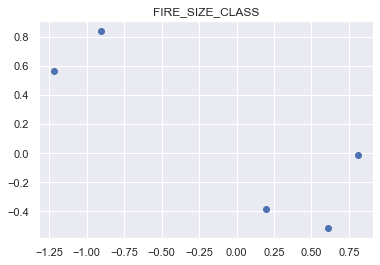

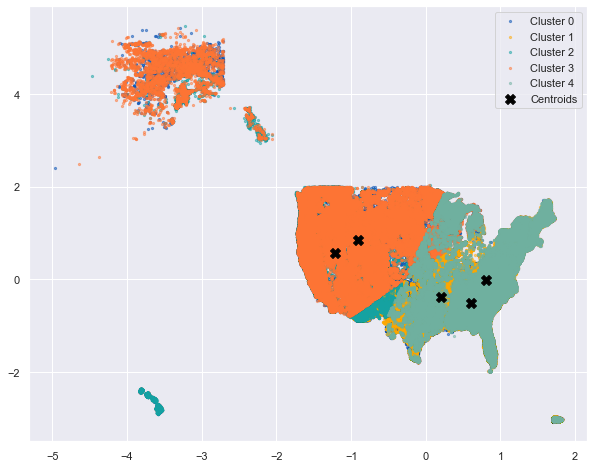

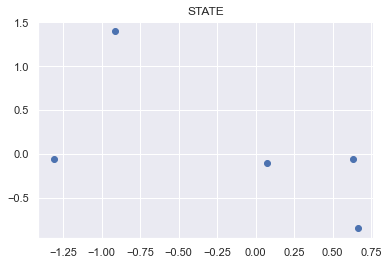

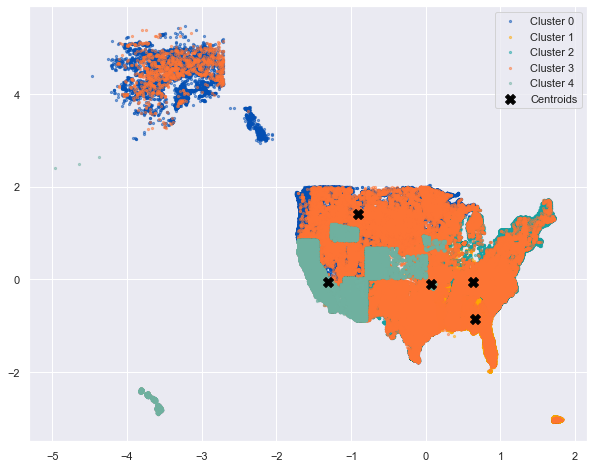

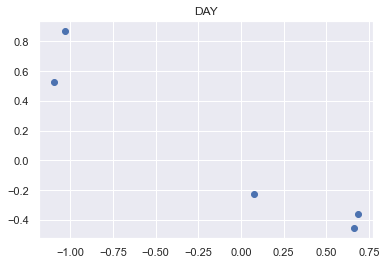

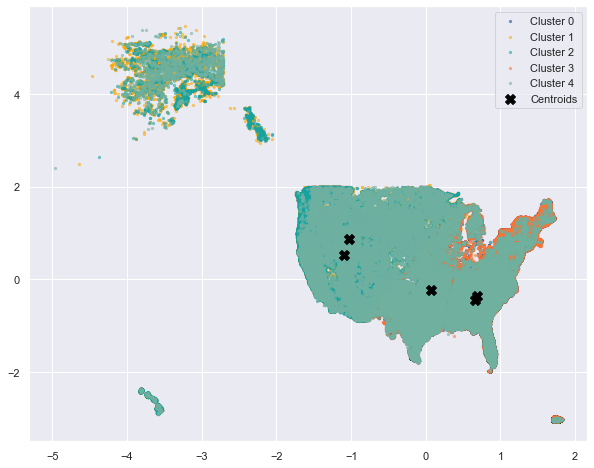

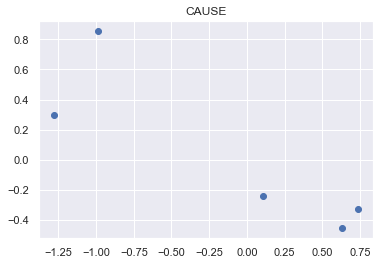

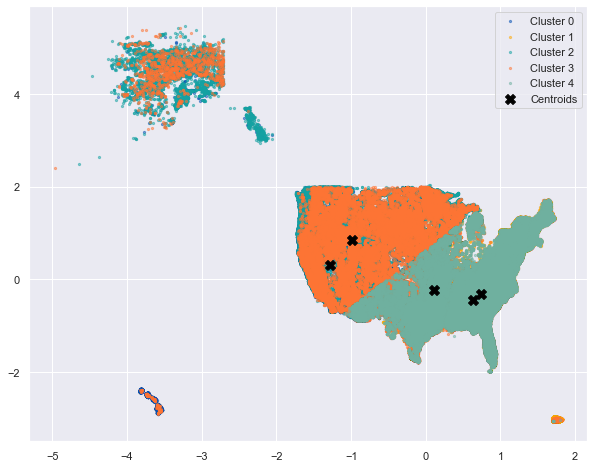

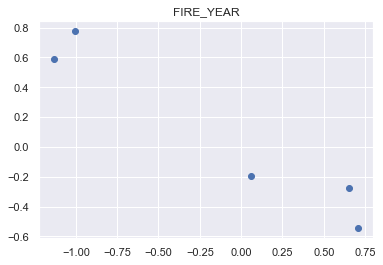

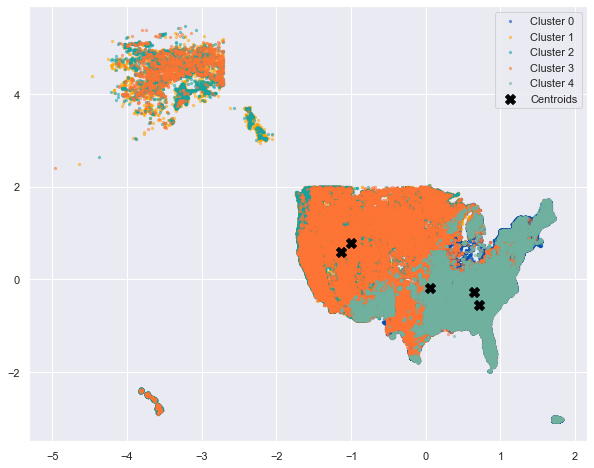

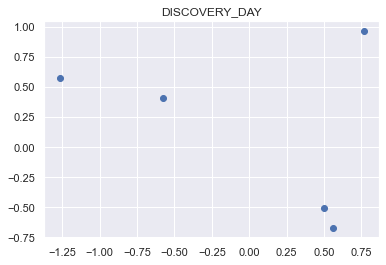

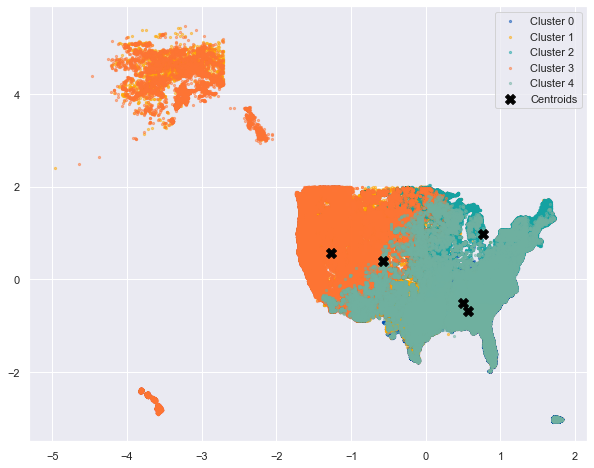

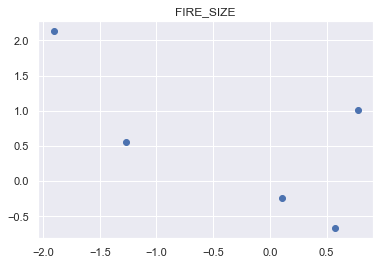

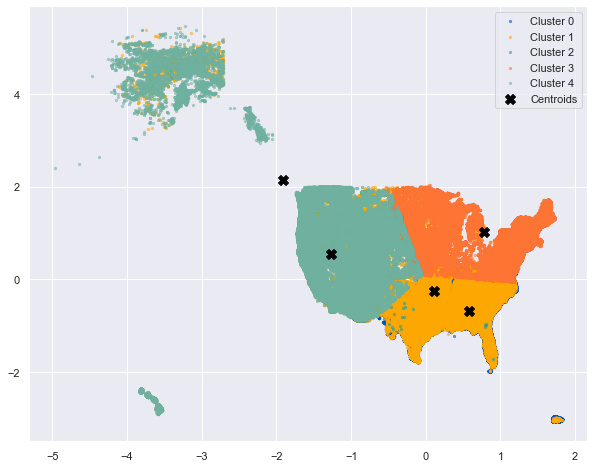

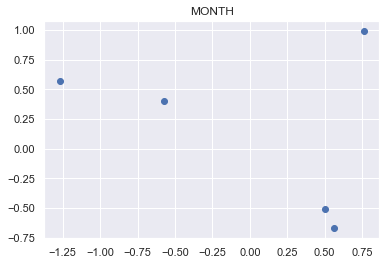

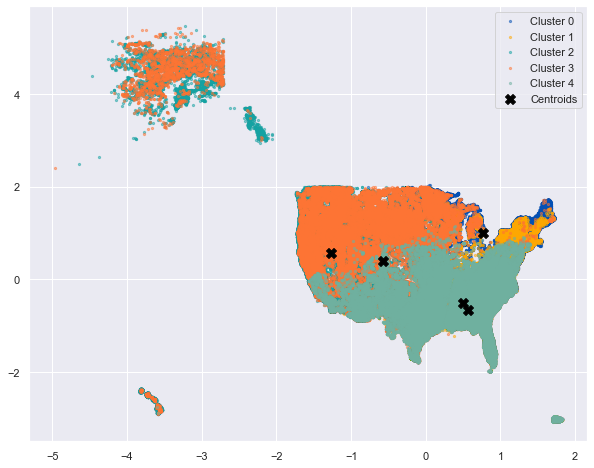

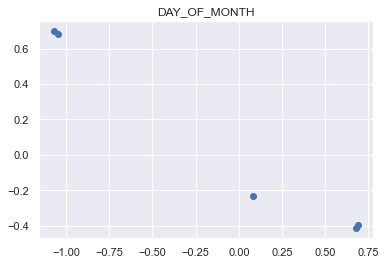

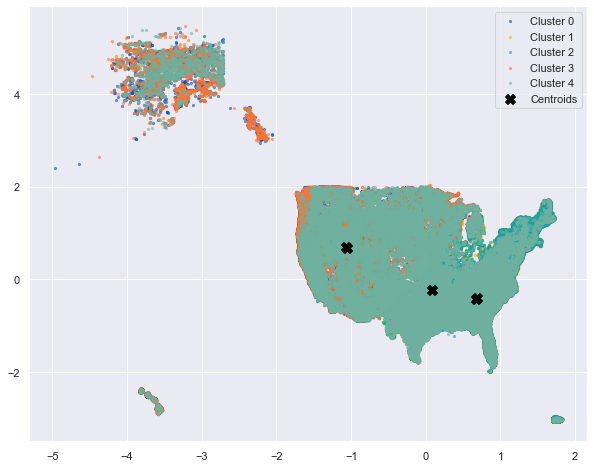

In [ ]:
# Pour mémoire : time > 10min.
model_kmeans3(fires_k_model)

### K-Means avec 2 clusters et 4 variables

In [ ]:
def model_kmeans4(dataframe) :
        for col in fires_k_model :
                fires_model_for_kmeans4 = fires_model[['LONGITUDE', 'LATITUDE', 'FIRE_SIZE_CLASS', col]]

                # Standardisation des données
                sc = StandardScaler()
                fires_model_norm4 = sc.fit_transform(fires_model_for_kmeans4)

                # Création DF
                fires_model_norm_kmeans4 = pd.DataFrame(fires_model_norm4, columns=['LONGITUDE','LATITUDE','FIRE_SIZE_CLASS', col])

                # Création de l'instance KMeans
                kmeans4 = KMeans(n_clusters=2)
                kmeans4.fit(fires_model_norm_kmeans4)
                y_kmeans4 = kmeans4.predict(fires_model_norm_kmeans4)

                # vecteur qui contient le numéro du groupe de chacune des données
                labels4 = kmeans4.labels_ 

                # Coordonnées des clusters / liste des positions des K centroïdes
                centroids4 = kmeans4.cluster_centers_

                # Graphique des centroïdes
                plt.scatter(centroids4[:, 0],centroids4[:, 1])
                plt.title(col)
                plt.show()

                # Représentation graphique K-means
                plt.figure(figsize=(10, 8))

                plt.scatter(fires_model_norm_kmeans4[y_kmeans4==0].iloc[:,0], fires_model_norm_kmeans4[y_kmeans4==0].iloc[:,1],
                        s=5, c='#0450B4', alpha=0.5, label='Cluster 0')

                plt.scatter(fires_model_norm_kmeans4[y_kmeans4==1].iloc[:,0], fires_model_norm_kmeans4[y_kmeans4==1].iloc[:,1],
                        s=5, c='#FEA802', alpha=0.5, label='Cluster 1')


                plt.scatter(centroids4[:, 0],centroids4[:, 1], s=100, c='black', label='Centroids', marker='X')

                plt.legend(loc='best')
                plt.show()

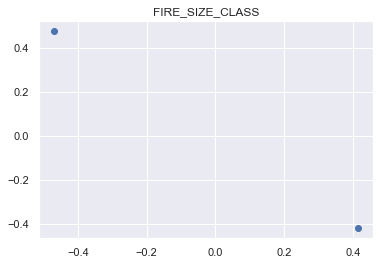

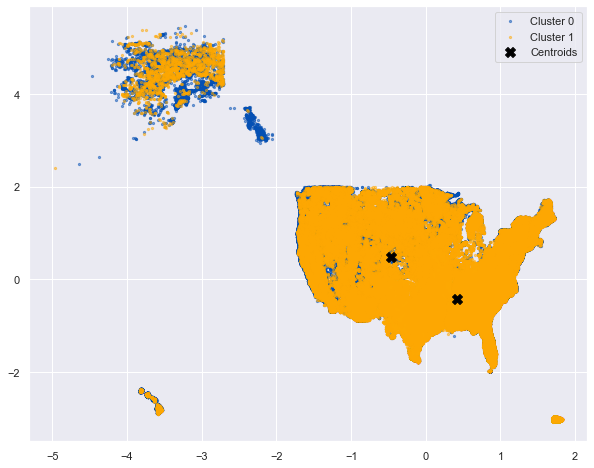

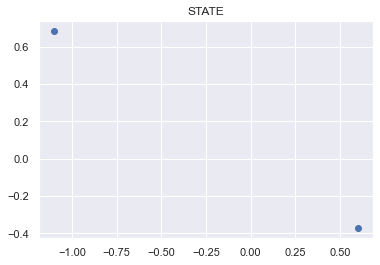

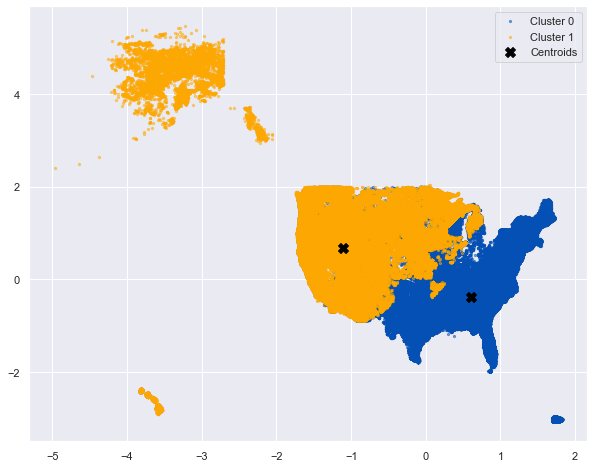

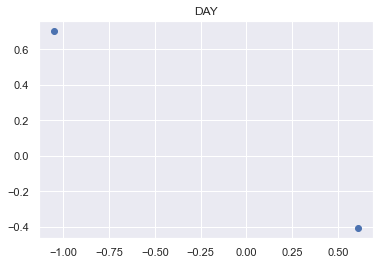

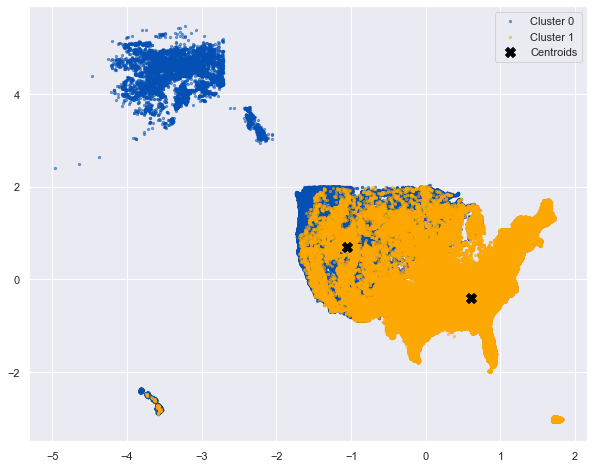

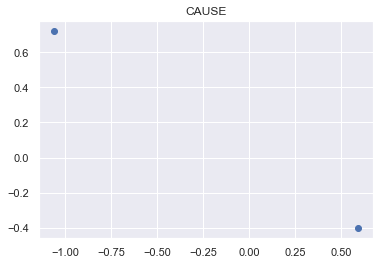

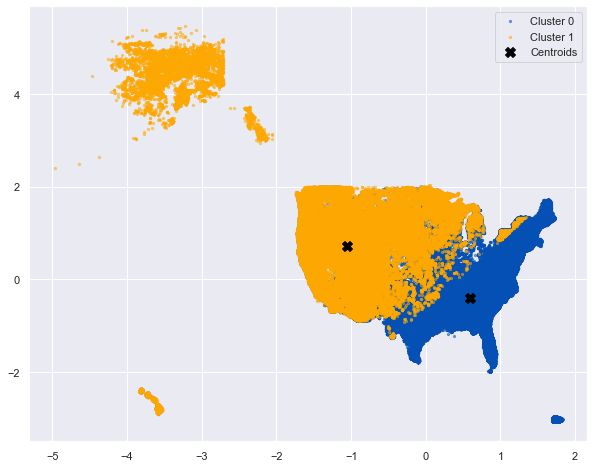

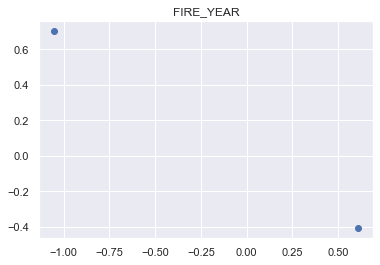

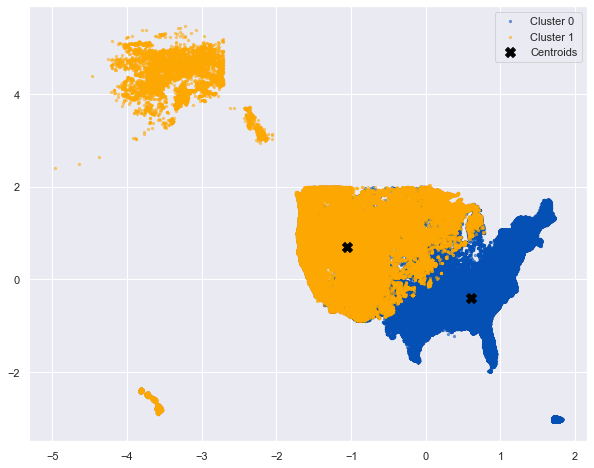

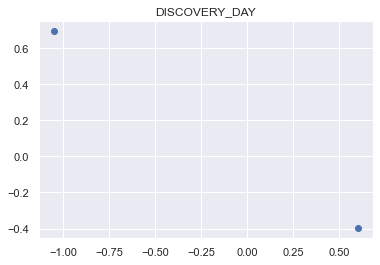

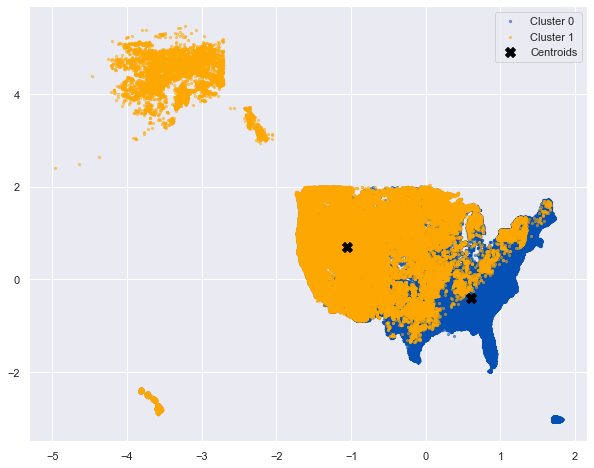

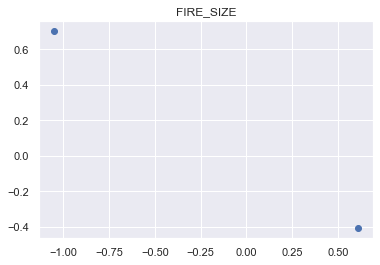

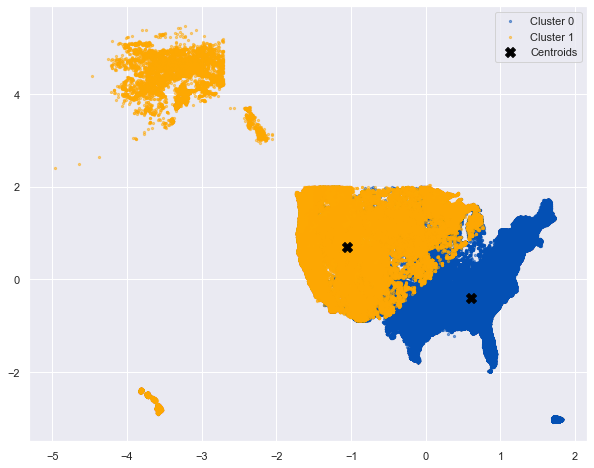

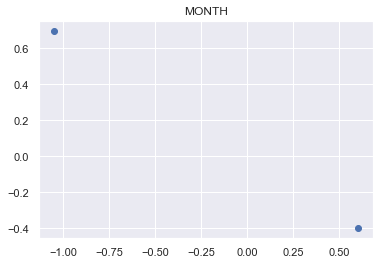

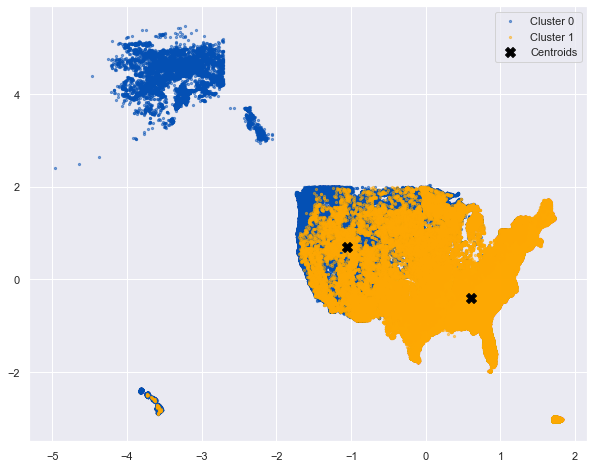

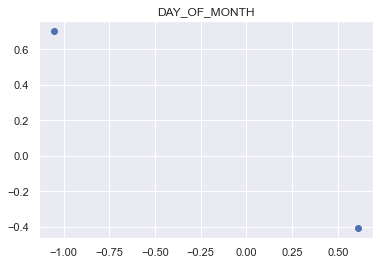

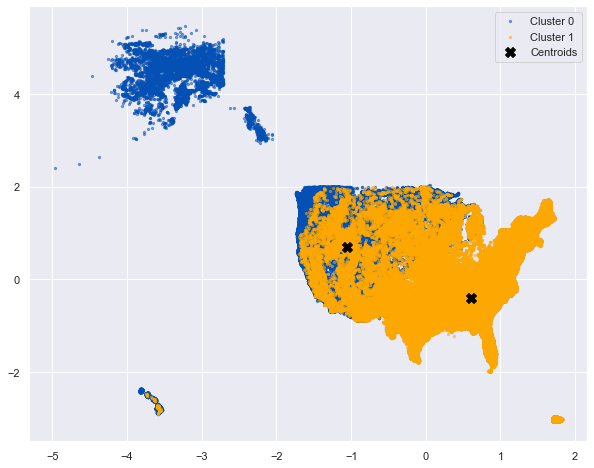

In [ ]:
# Pour mémoire : time > 4min.
model_kmeans4(fires_k_model)